# Cardiovascular Disease 

## Business Understanding

### The company

Cardio Catch Disease is a healthcare company specialized in diagnosing cardiovascular disease in early stages. Its bussiness model is offering this early diagnosis of cardiovascular disease for a certain price.

### The problem
Currently, the precision of the diagnosis ranges between 55% and 65%, reflecting its complexity and the limited availability of medical doctors. The total cost per diagnosis, encompassing both equipment and analysts' compensation, is approximately $1,000.

For clients, the pricing model for the diagnosis costs $500 for every 5% increase in precision beyond the 50% baseline.

## Objective

Create a model that improves the precision of the diagnosis in a stable and efficient way for all clients.

### What to Deliver
- The precision of the model
- What is the revenue of the new model?
- How reliable are the results of the new tool?

## Solution Planning

### Dataset from [Kaggle](https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset)

### CRISPDM Process

    - Business understanding
    - Data understanding
    - Data preparation
    - Data analysis
    - Feature engineering
    - Modeling
    - Model development
    - Model evaluation
    - Model deployment

### Project Structure

    - Imports
    - Data Description
    - Preprocessing and Data Exploration
    - Exploratory Data Analysis
    - Feature Engineering
    - Machine Learning and Evaluation
    - Business Results

# Steps

## 0. Imports

### 0.1. Libraries

In [1]:
### Data manipulation 
import pandas                   as pd
import numpy                    as np

### Data visualization
import seaborn                  as sns
import matplotlib               as mpl
import matplotlib.pyplot        as plt

### Feature Engineering
from boruta                     import BorutaPy
from sklearn.model_selection    import train_test_split
from sklearn.preprocessing      import MinMaxScaler, RobustScaler

### Machine learning 
from lightgbm                   import LGBMClassifier
from sklearn.linear_model       import LogisticRegression
from sklearn.ensemble           import ExtraTreesClassifier, RandomForestClassifier

from sklearn.model_selection    import RandomizedSearchCV 

# # Evaluation Metrics
from sklearn.metrics            import accuracy_score, precision_score, recall_score, f1_score, make_scorer
from sklearn.metrics            import confusion_matrix, classification_report, ConfusionMatrixDisplay

### Other libraries
from IPython.display            import Image 
import warnings

### 0.2. Settings

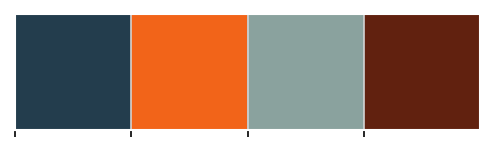

In [2]:
### Ignoring warnings
warnings.filterwarnings('ignore')

### Pandas Settings
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_columns', None)

### Visualization Settings
%matplotlib inline

mpl.style.use('ggplot')

mpl.rcParams['figure.figsize']      = (20, 5)
mpl.rcParams['figure.titlesize']    = 25
mpl.rcParams['axes.facecolor']      = 'white'
mpl.rcParams['axes.linewidth']      = 1
mpl.rcParams['grid.color']          = 'lightgray'
mpl.rcParams['xtick.color']         = 'black'
mpl.rcParams['ytick.color']         = 'black'
mpl.rcParams['font.size']           = 12
mpl.rcParams['axes.grid']           = True
mpl.rcParams['figure.dpi']          = 150

### Palette Seting
cardio_palette = ['#233D4D', '#F26419', '#8AA29E', '#61210F']
kde_palette = ['#233D4D', '#61210F']
sns.set_palette(sns.color_palette(cardio_palette))
sns.palplot(sns.color_palette(cardio_palette))

### Random Seed
SEED = 42

### 0.3. Functions

In [3]:
### Functions

def df_shape(df):
    """
    Summary: The function prints the number of rows and columns of a given DataFrame.

    Args:
        df: the DataFrame we want to know more about.
    
    Returns: a text indicating the number of rows and columns of the DataFrame.
    """

    print('Number of rows: {:,}'.format(df.shape[0]))
    print('Number of columns: {:,}'.format(df.shape[1]))

    return None

def set_image(fig, title, xlabel, ylabel, xrotation=0, yrotation=0):
    """
    Summary: This function sets the image configuration.

    Args:
        title: the title of the plot.
        xlabel: the label for the x axis.
        ylabel: the label for the y axis.
        rotation: the rotation of the labels. default as 0.

    Returns: None
    """

    plt.title(title)
    plt.xlabel(xlabel, color='black')
    plt.ylabel(ylabel, color='black')
    plt.xticks(rotation=xrotation)
    plt.yticks(rotation=yrotation)
    plt.tick_params(left=False, bottom=False)

    return fig

### Feature Engineering

def scaling_columns(df, columns, scaler):
    """
    Summary: This function was created to scale the columns faster and easier.

    Args: Dataframe, list of columns and scaler.

    Returns: Dataframe with scaled columns.
    """
    # Fit and transform the specified columns
    df[columns] = scaler.fit_transform(df[columns].values)
    
    return df

### Machine Learning

def model_report(model_name,y_test, y_pred):
    """
    Summary: This function was created to print the metrics of each model. 
    The metrics include Accuracy, Precision, Recall, F1 Score and Classification Report.

    Args: Model name, values for y_test and y_pred.

    Returns: None
    """

    print('Model Name:', model_name)
    print('Accuracy:',  np.round(accuracy_score(y_test, y_pred), 4))
    print('Precision:', np.round(precision_score(y_test, y_pred), 4))
    print('Recall:',    np.round(recall_score(y_test, y_pred), 4))
    print('F1 Score:',  np.round(f1_score(y_test, y_pred), 4))
    print('Classification Report: \n', classification_report(y_test, y_pred))

    return None

def CM(title, y_test, y_pred):
    """
    Summary: This function prints the Confusion Matrix for each model.

    Args: title for the plot, values for y_test and y_pred of the model.

    Returns: None
    """
    # Set size for figure
    plt.figure(figsize=(5, 5)) 

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)

    # Customizing the plot
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues', values_format='d')  

    # Image Settings    
    plt.title(title)
    plt.xlabel('Predicted Label', color='black')
    plt.ylabel('True Label', color='black')
    plt.tick_params(left=False, bottom=False);
     
    return None

### 0.4. Loading data

In [4]:
# Importing the dataset as a DataFrame
data = pd.read_csv('../data/raw/cardio_train.csv', sep = ';')

## 1. Data Description

In [5]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.000,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.000,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.000,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.000,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.000,100,60,1,1,0,0,0,0


### 1.1. Data Dimensions

In [6]:
df_shape(data)

Number of rows: 70,000
Number of columns: 13


### 1.2. Types

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


### 1.3. Data Columns

| Variable        | Description                       | Value Type                                       |
|-----------------|-----------------------------------|--------------------------------------------------|
| `id`            | Unique identification number      | `int`                                            |
| `age`           | Age of the patient                | `int` (days)                                     |
| `gender`        | Gender of the patient             | `int` encoded as 1: female, 2: male              |
| `height`        | Height of the patient             | `int` (cm)                                       |
| `weight`        | Weight of the patient             | `float` (kg)                                       |
| `ap_hi`         | Systolic blood pressure           | `int`                                            |
| `ap_lo`         | Diastolic blood pressure          | `int`                                            |
| `cholesterol`   | Cholesterol                       | 1: normal, 2: above normal, 3: well above normal |
| `gluc`          | Glucose                           | 1: normal, 2: above normal, 3: well above normal |
| `smoke`         | Smoking                           | binary                                           |
| `alco`          | Alcohol intake                    | binary                                           |
| `active`        | Physical activity                 | binary                                           |
| `cardio`        | Presence or absence of cardiovascular disease | binary                               |


### 1.4. Description summary

- There are no missing values in the dataset.
- There are no `object` type columns in the dataset.

## 2. Preprocessing and Data Exploration

### 2.1. Transforming `age` from days to years

In [8]:
# Transforming `age` from days to years
data['age'] = data['age'] // 365

### 2.2. Checking data balance

In [9]:
# Checking data balance
balance = pd.DataFrame(
    {'Total' : data['cardio'].value_counts(), 
    '% Pct.' : data['cardio'].value_counts(normalize=True) * 100}
).sort_values('Total', ascending=False)

# Displaying data balance
balance

,Total,% Pct.
0,35021,50.030
1,34979,49.970


### 2.3. Numerical Data

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,70000.000,49972.420,28851.302,0.000,25006.750,50001.500,74889.250,99999.000
age,70000.000,52.841,6.767,29.000,48.000,53.000,58.000,64.000
gender,70000.000,1.350,0.477,1.000,1.000,1.000,2.000,2.000
height,70000.000,164.359,8.210,55.000,159.000,165.000,170.000,250.000
weight,70000.000,74.206,14.396,10.000,65.000,72.000,82.000,200.000
ap_hi,70000.000,128.817,154.011,-150.000,120.000,120.000,140.000,16020.000
ap_lo,70000.000,96.630,188.473,-70.000,80.000,80.000,90.000,11000.000
cholesterol,70000.000,1.367,0.680,1.000,1.000,1.000,2.000,3.000
gluc,70000.000,1.226,0.572,1.000,1.000,1.000,1.000,3.000
smoke,70000.000,0.088,0.283,0.000,0.000,0.000,0.000,1.000


### 2.4. Corrections

#### Blood pressure
- Diastolic pressure (`ap_lo`) is always lower than Systolic (`ap_hi`) because it reflects the pressure inside the arteries during resting phase, but in some cases we have `ap_lo > ap_hi`. So these rows will be considered as mistakes and be removed;
- Removing rows where blood pressure is negative;
- The removing will be executed ov values that fall below 2.5% and are above 97.5%;
- Results: 
> - There are no `ap_hi` below 100 and no `ap_lo` higher than 100;
> - Unlikely high numbers like 16020 and 11000 were removed;
> - Negative numbers were removed.

In [11]:
data.drop(data[(data['ap_hi'] > data['ap_hi'].quantile(0.975)) | (data['ap_hi'] < data['ap_hi'].quantile(0.025))].index, inplace=True)
data.drop(data[(data['ap_lo'] > data['ap_lo'].quantile(0.975)) | (data['ap_lo'] < data['ap_lo'].quantile(0.025))].index, inplace=True)

#### Height and Weight
- Other errors are noticed in the height and weight columns;
- Height of 55cm and 250cm would be considered as the shortest and tallest person alive, respectively (considering that the ages are correct);
- The same happens for 10 kg;
- The removing will be executed ov values that fall below 2.5% and are above 97.5%

In [12]:
# Height
data.drop(data[(data['height'] > data['height'].quantile(0.975)) | (data['height'] < data['height'].quantile(0.025))].index, inplace=True)

# Weight
data.drop(data[(data['weight'] > data['weight'].quantile(0.975)) | (data['weight'] < data['weight'].quantile(0.025))].index, inplace=True)

## 3. Exploratory Data Analysis

### 3.1. At what age people with cardiovascular disease outnumber people without cardiovascular disease? Are older people more at risk?

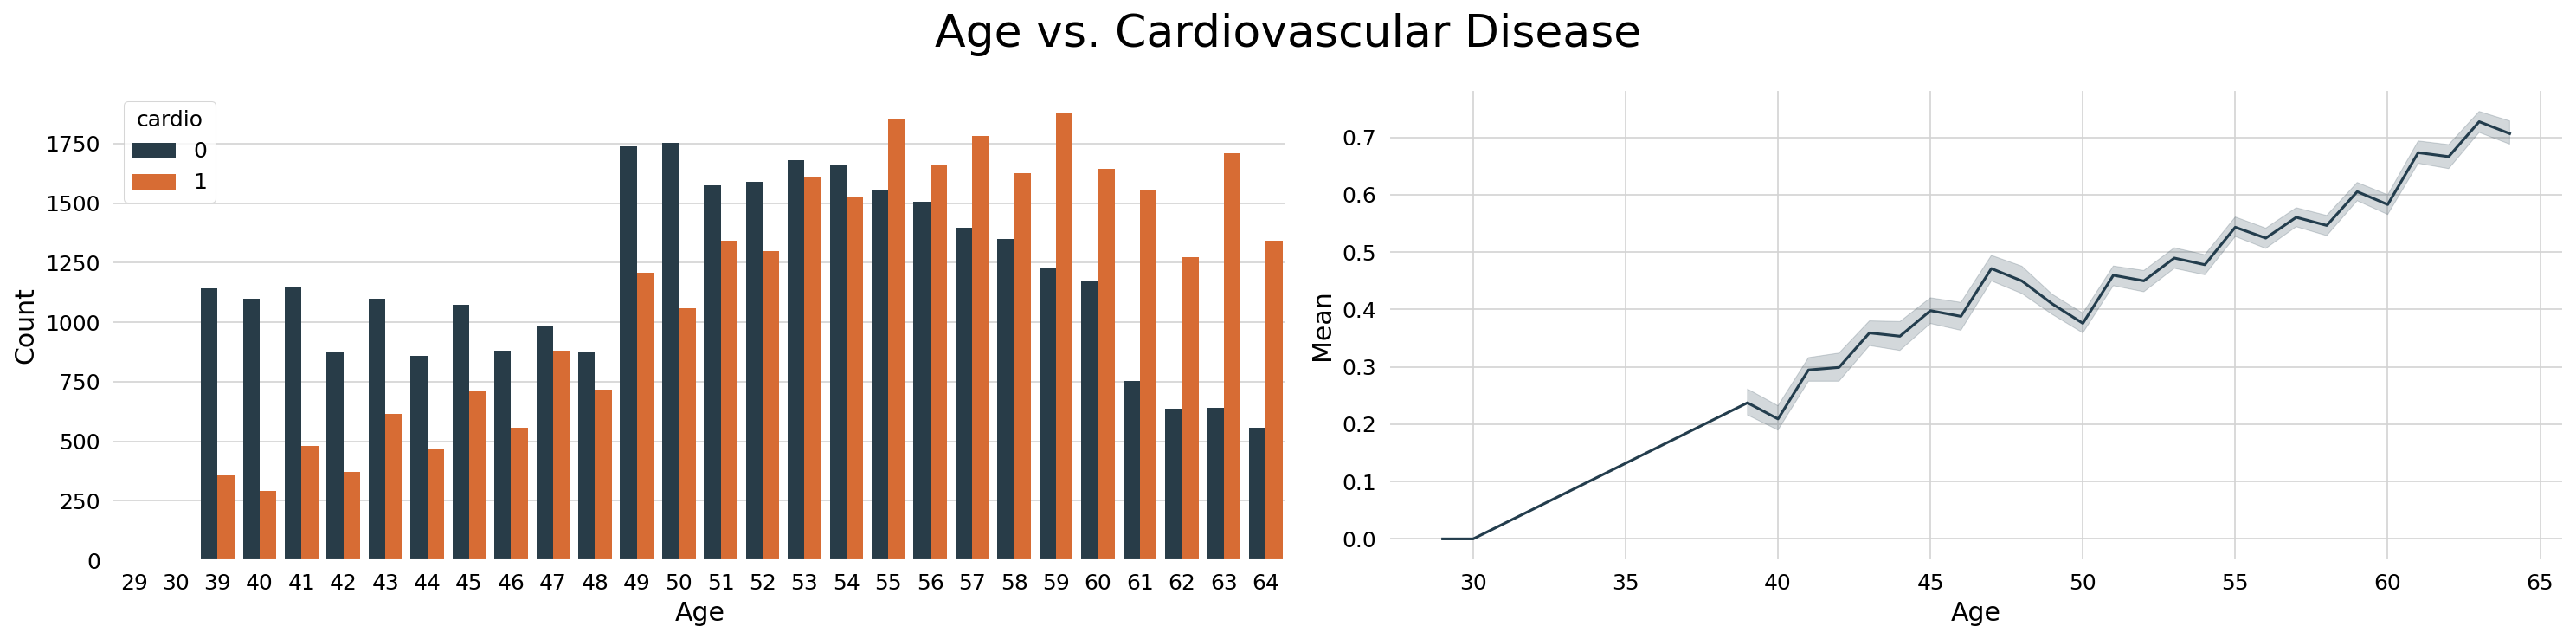

In [13]:
# Creating Figure
fig_01, axes = plt.subplots(1, 2)

# Plot 1
plt.subplot(1, 2, 1)
fig_011 = sns.countplot(data=data, x='age', hue='cardio')
fig_011 = set_image(fig_011, None, 'Age', 'Count')

# Plot 2
plt.subplot(1, 2, 2)
fig_012 = sns.lineplot(data=data, x='age', y='cardio', estimator='mean')
fig_012 = set_image(fig_012, None, 'Age', 'Mean')

# Main Title
fig_01.suptitle('Age vs. Cardiovascular Disease')

# Adjusting Spacing
fig_01.tight_layout()

### 3.2. How is the distribution of variables: `gender`, `cholesterol`, `gluc`, `smoke`, `alco`, `active`?

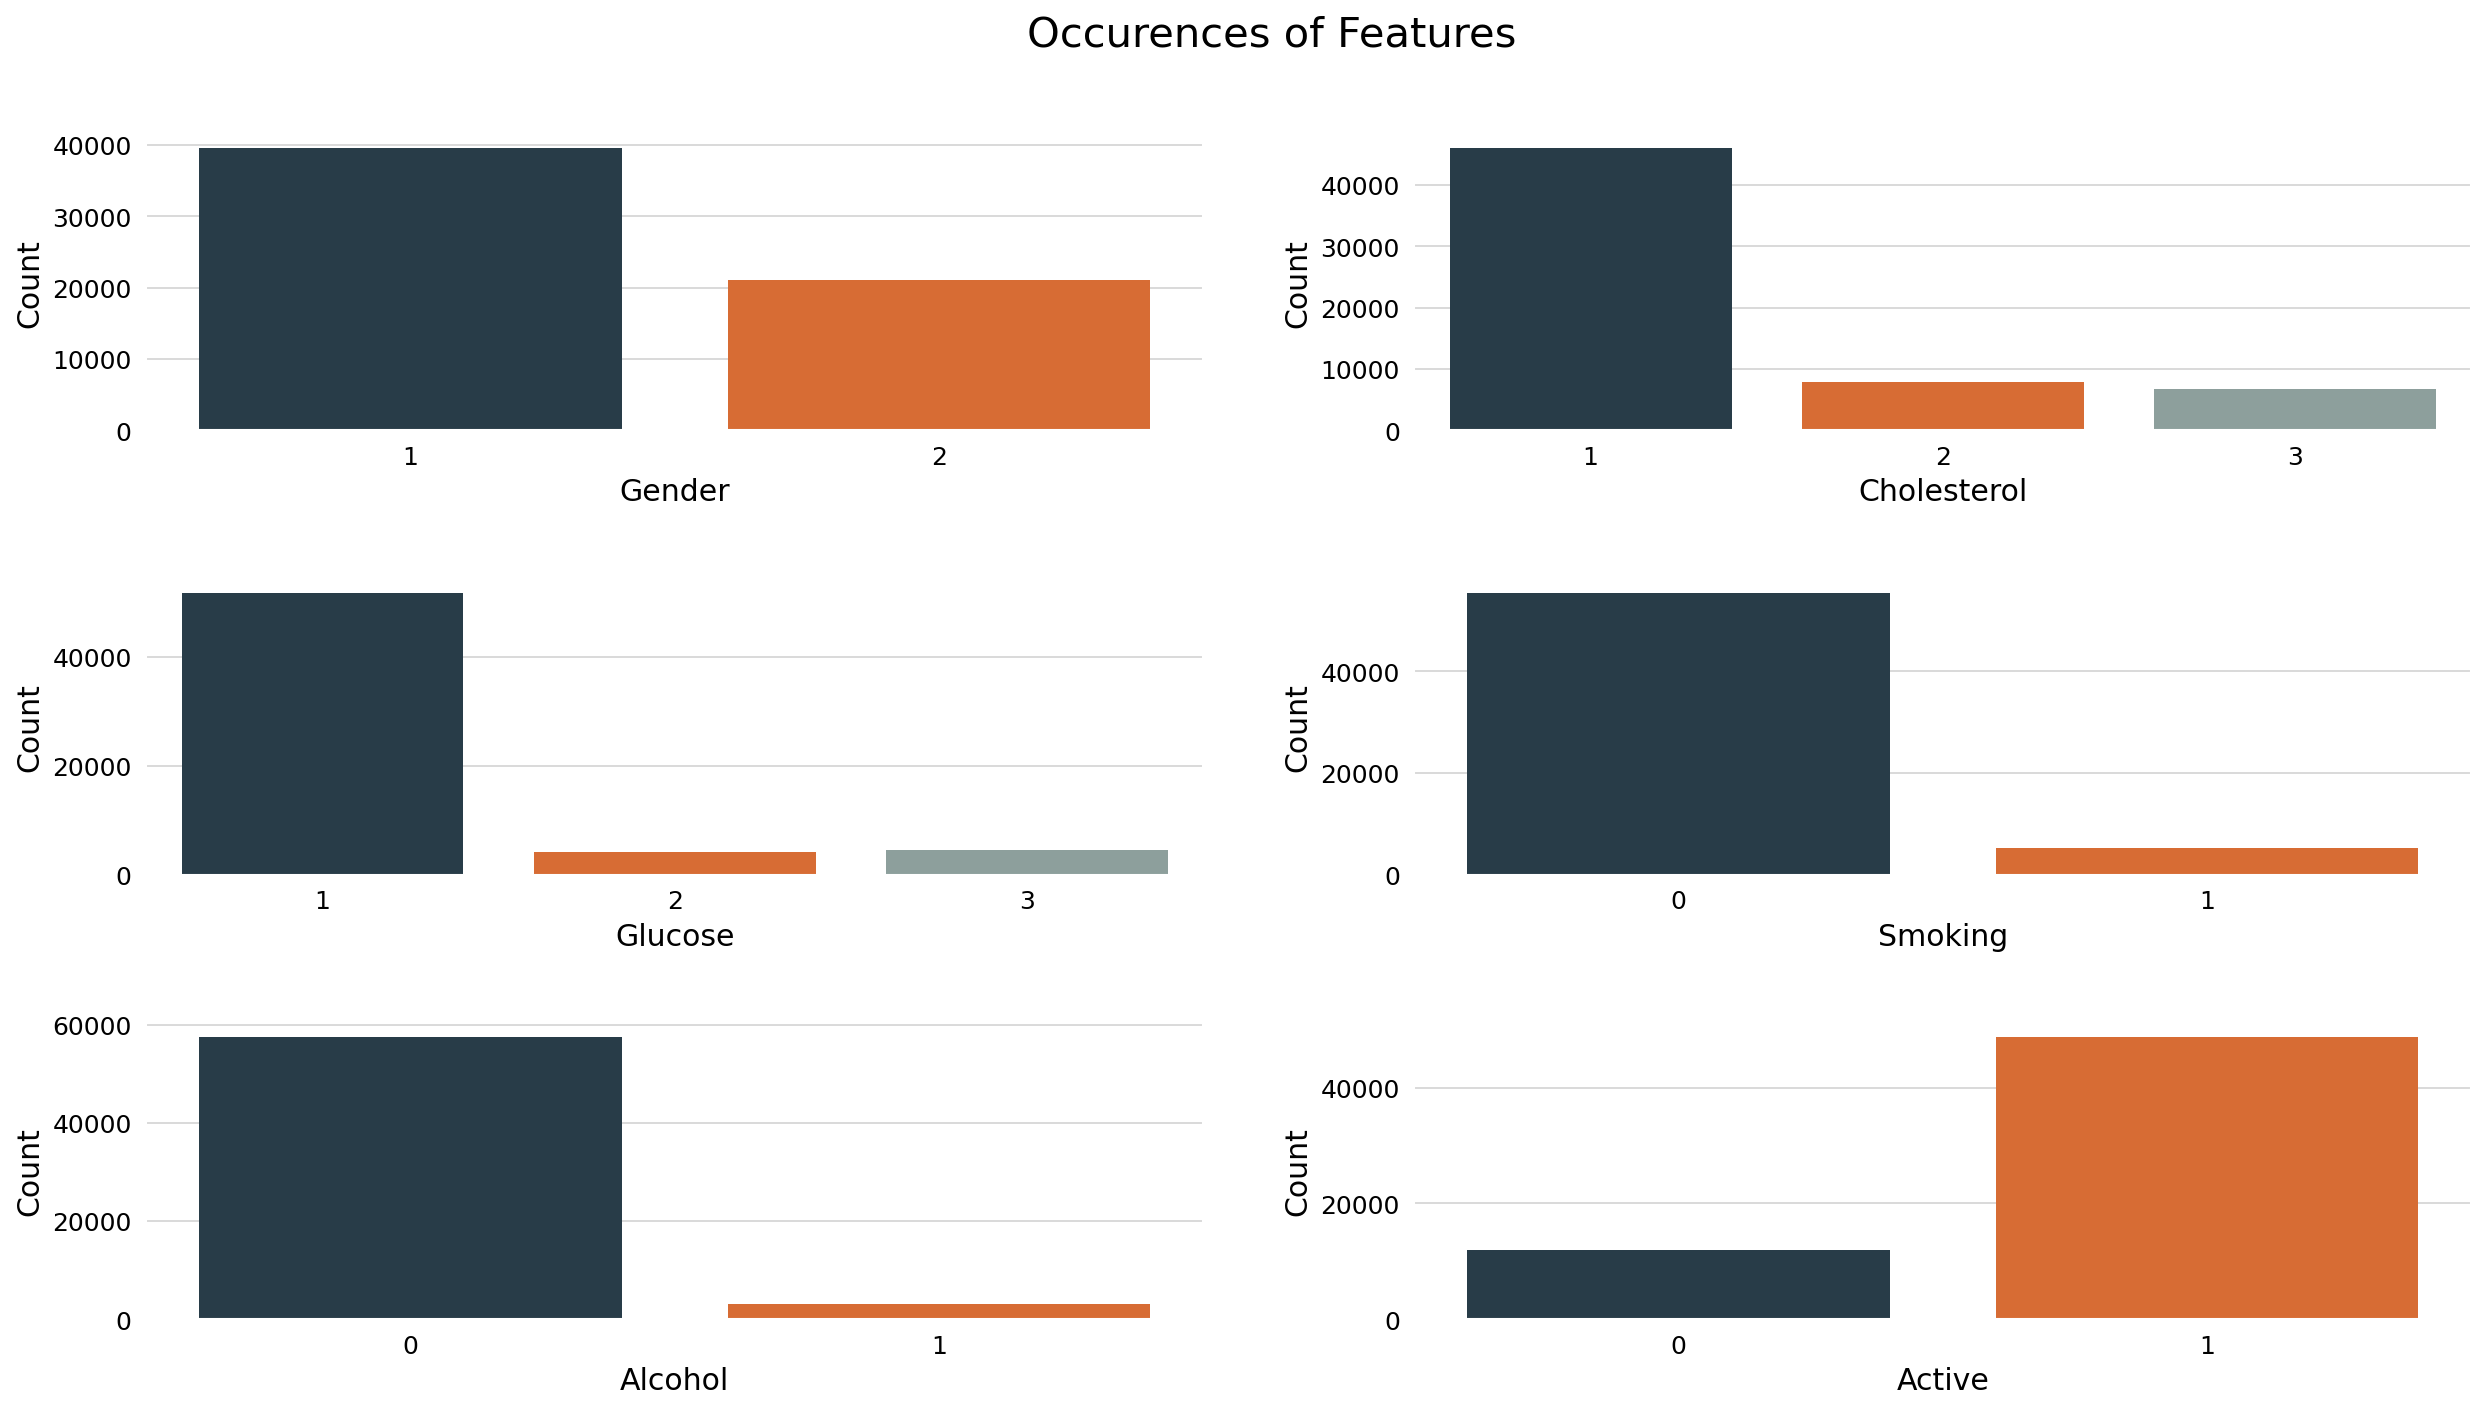

In [14]:
# Creating Figure
fig_02, axes = plt.subplots(3, 2, figsize=(20, 10))

# Plot 1
plt.subplot(3, 2, 1)
fig_021 = sns.countplot(data=data, x='gender')
fig_021 = set_image(fig_021, None, 'Gender', 'Count')

# Plot 2
plt.subplot(3, 2, 2)
fig_022 = sns.countplot(data=data, x='cholesterol')
fig_022 = set_image(fig_022, None, 'Cholesterol', 'Count')

# Plot 3
plt.subplot(3, 2, 3)
fig_023 = sns.countplot(data=data, x='gluc')
fig_023 = set_image(fig_023, None, 'Glucose', 'Count')

# Plot 4
plt.subplot(3, 2, 4)
fig_024 = sns.countplot(data=data, x='smoke')
fig_024 = set_image(fig_024, None, 'Smoking', 'Count')

# Plot 5
plt.subplot(3, 2, 5)
fig_025 = sns.countplot(data=data, x='alco')
fig_025 = set_image(fig_025, None, 'Alcohol', 'Count')

# Plot 6
plt.subplot(3, 2, 6)
fig_026 = sns.countplot(data=data, x='active')
fig_026 = set_image(fig_026, None, 'Active', 'Count')

# Main Title
fig_02.suptitle('Occurences of Features', fontsize=20)

# Adjusting Spacing
fig_02.subplots_adjust(top=0.9, hspace=0.5)

### 3.3. The higher the cholesterol, the greater the risk?

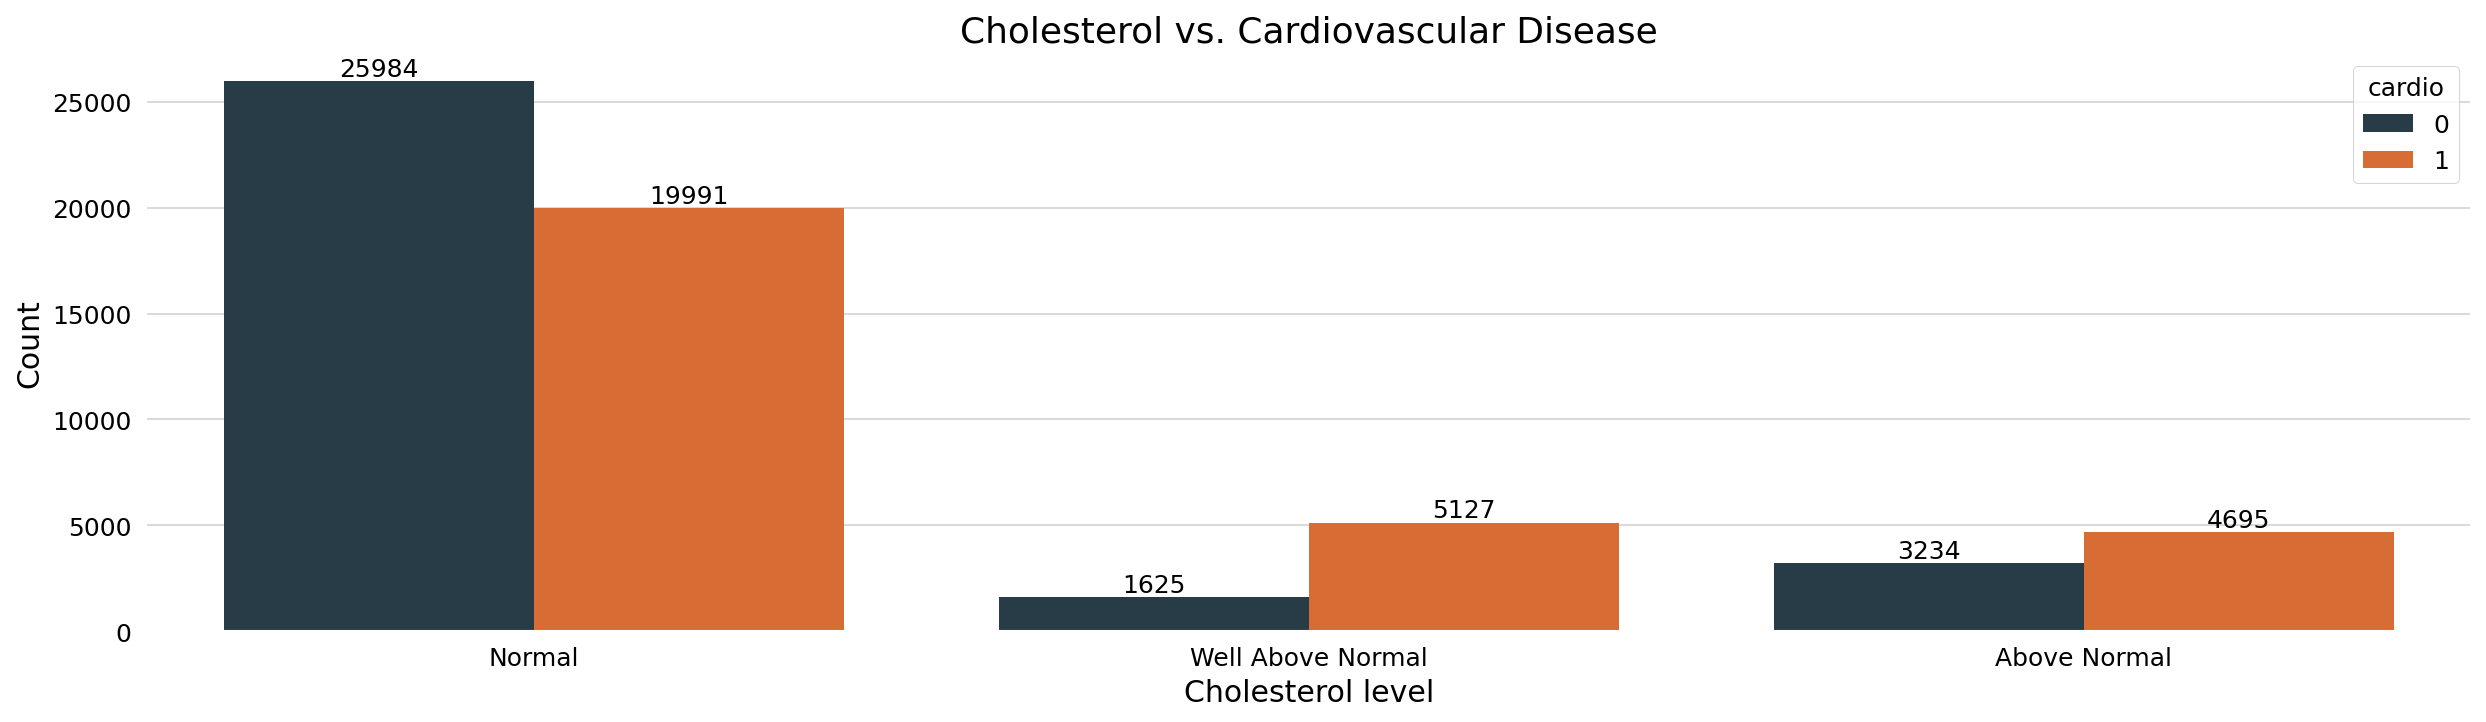

In [15]:
# Data Manipulation
chol = data[['cholesterol', 'cardio']]

mapping = {1: 'Normal', 2: 'Above Normal', 3: 'Well Above Normal'}
chol['cholesterol'] = chol['cholesterol'].map(mapping)

# Creating Figure
fig_03 = sns.countplot(data=chol, x='cholesterol', hue='cardio')

# Customizing Figure
fig_03 = set_image(fig_03, 'Cholesterol vs. Cardiovascular Disease', 'Cholesterol level', 'Count')

for i in fig_03.containers:
    fig_03.bar_label(i)

### 3.4. The higher the glucose, the higher the risk?

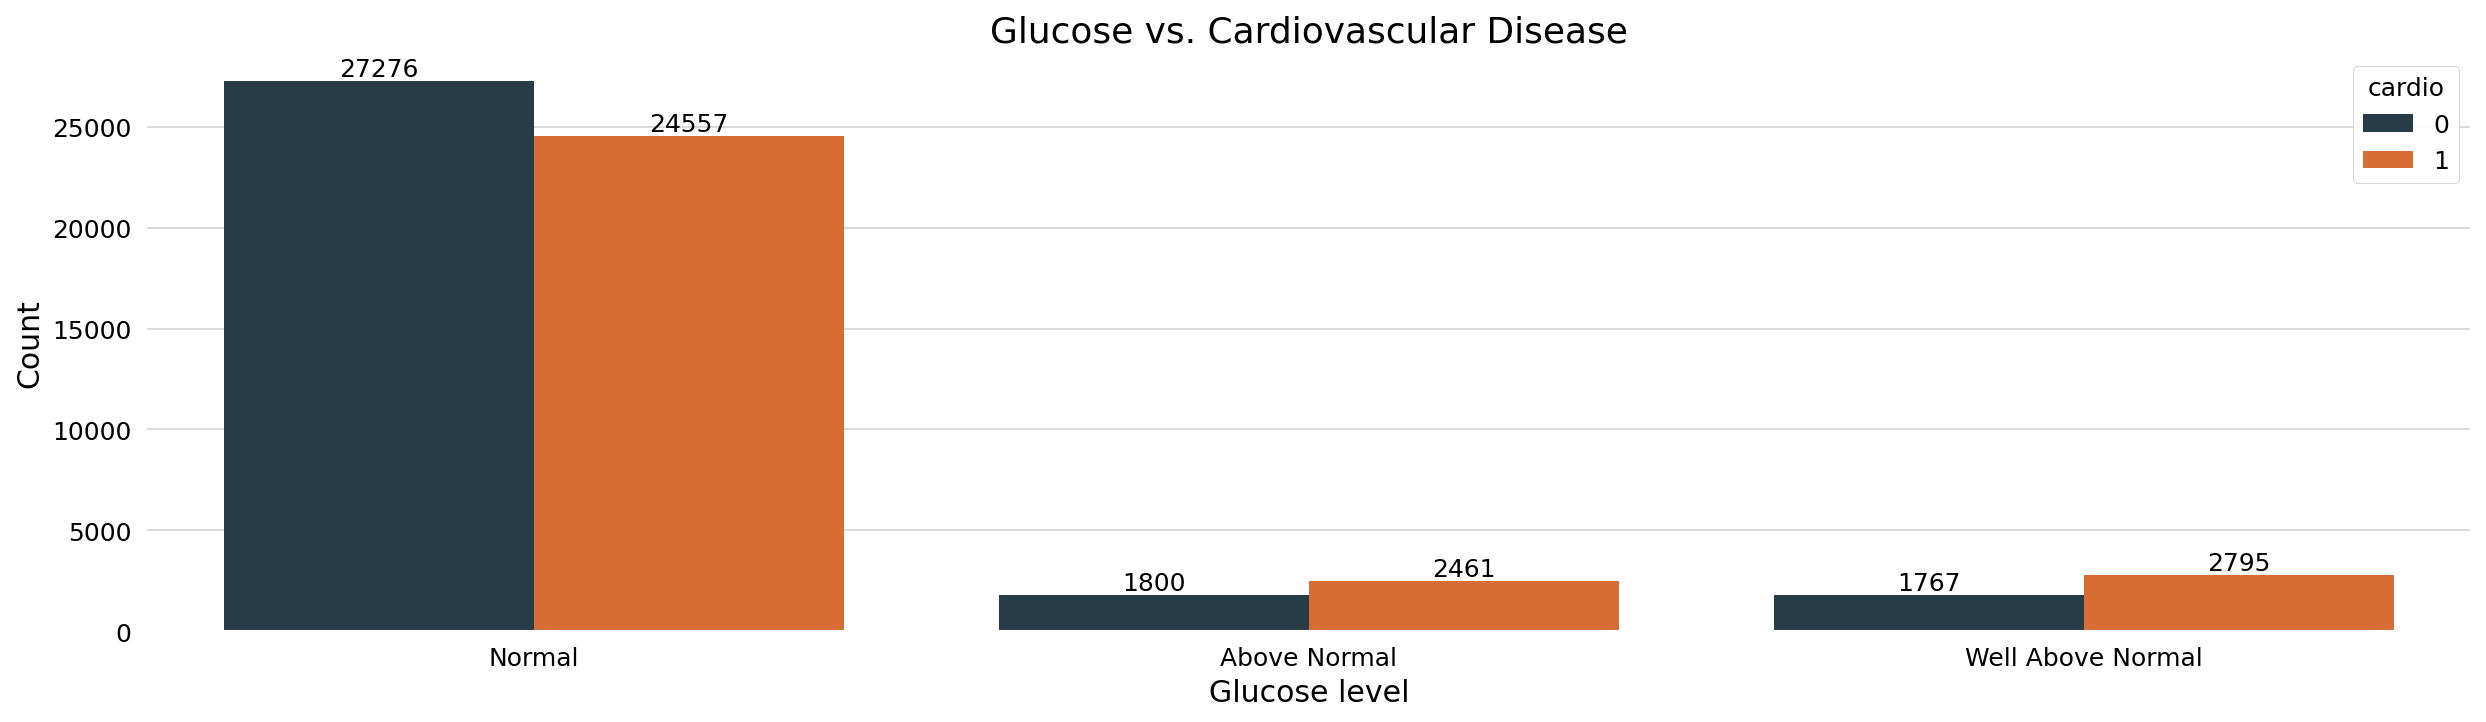

In [16]:
# Data Manipulation
gluc = data[['gluc', 'cardio']]

mapping = {1: 'Normal', 2: 'Above Normal', 3: 'Well Above Normal'}
gluc['gluc'] = gluc['gluc'].map(mapping)

# Creating Figure
fig_04 = sns.countplot(data=gluc, x='gluc', hue='cardio')

# Customizing Figure
fig_04 = set_image(fig_04, 'Glucose vs. Cardiovascular Disease', 'Glucose level', 'Count')

for i in fig_04.containers:
    fig_04.bar_label(i)

### 3.5. The taller the person, the greater the risk?

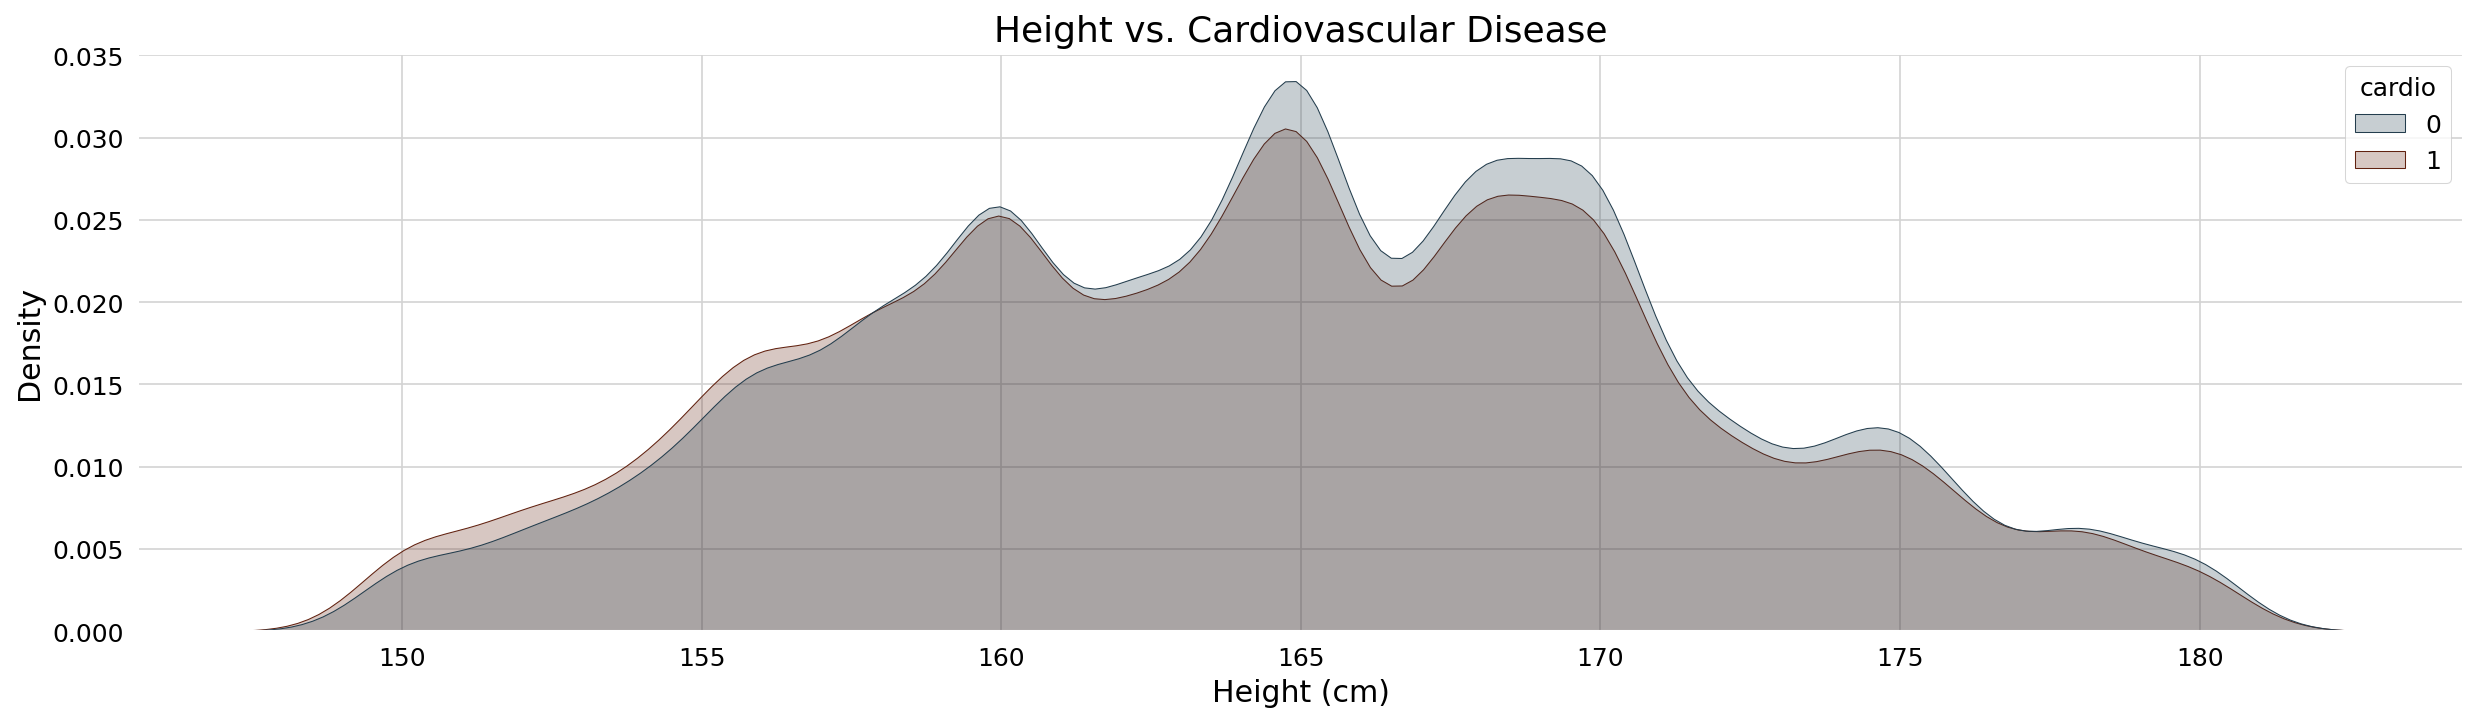

In [17]:
# Creating Figure
fig_05 = sns.kdeplot(data=data, x='height', hue='cardio', palette=kde_palette, fill=True)

# Customizing Figure
fig_05 = set_image(fig_05, 'Height vs. Cardiovascular Disease', 'Height (cm)', 'Density')

### 3.6. Distribution of `age`, `height` and `weight` filtered by `gender`.

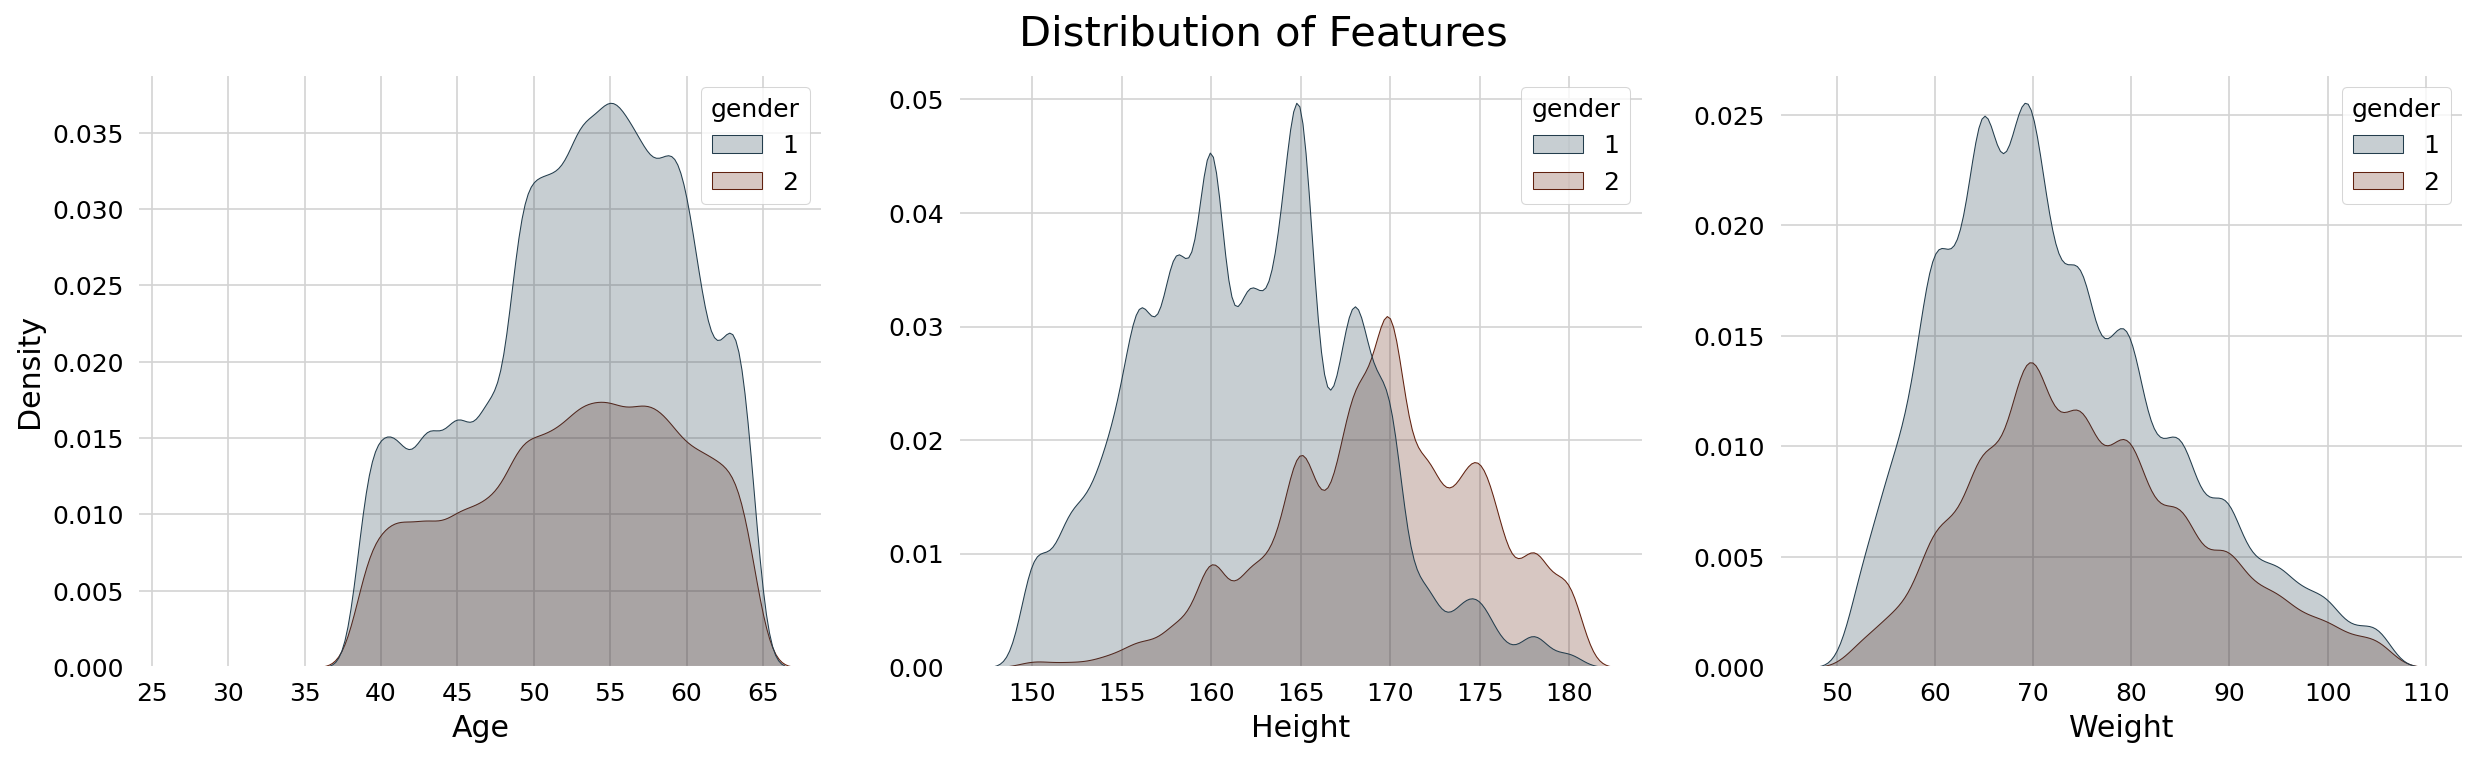

In [18]:
# Creating Figure
fig_06, axes = plt.subplots(1, 3)

# Plot 1
plt.subplot(1, 3, 1)
fig_061 = sns.kdeplot(data=data, x='age', hue='gender', palette=kde_palette, fill=True)
fig_061 = set_image(fig_061, None, 'Age', 'Density')

# Plot 2
plt.subplot(1, 3, 2)
fig_062 = sns.kdeplot(data=data, x='height', hue='gender', palette=kde_palette, fill=True)
fig_062 = set_image(fig_062, None, 'Height', None)

# Plot 3
plt.subplot(1, 3, 3)
fig_063 = sns.kdeplot(data=data, x='weight', hue='gender', palette=kde_palette, fill=True)
fig_063 = set_image(fig_063, None, 'Weight', None)

# Main Title
fig_06.suptitle('Distribution of Features', fontsize=20)

# Adjusting Spacing
fig_06.subplots_adjust(top=0.9)

### 3.7. Which gender: consumes more alcohol, is more active and smoke more?

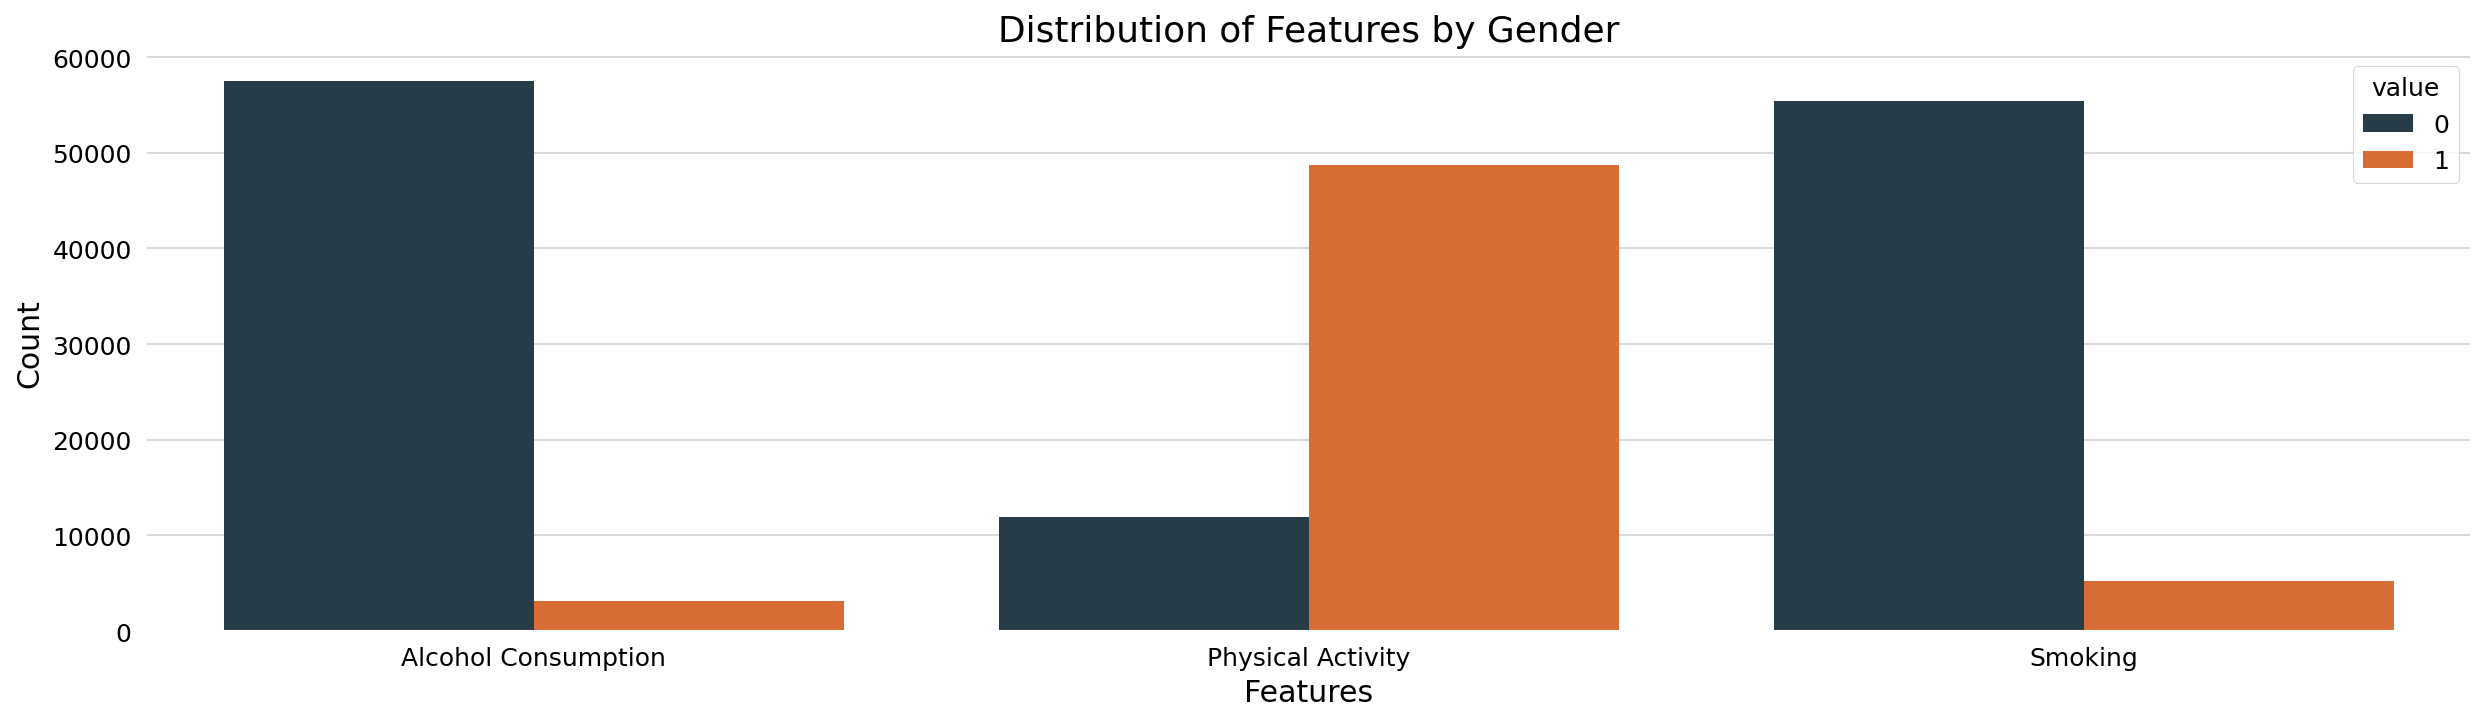

In [19]:
# Melted data for long-form representation
melted_data = data.melt(id_vars=['gender'], value_vars=['alco', 'active', 'smoke'])

# Stacked bar plot
fig_07 = sns.countplot(x='variable', hue='value', data=melted_data)

# Customizing Figure
fig_07 = set_image(fig_07, 'Distribution of Features by Gender', 'Features', 'Count')

# Changing the labels
feature_names = {'alco': 'Alcohol Consumption', 'active': 'Physical Activity', 'smoke': 'Smoking'}
plt.xticks(ticks=range(3), labels=[feature_names[var] for var in melted_data['variable'].unique()]);

### 3.8. What is the distribution on cardiovascular disease and gender?

In [20]:
pd.crosstab(data['cardio'], data['gender'], normalize=True)

gender,1,2
cardio,,
0,0.331,0.178
1,0.322,0.170


| Cardio | Gender | Pctg. | 
|--------|--------|-------|
| 0      | Female | 0.331 | 
| 0      | Male   | 0.178 | 
| 1      | Female | 0.322 | 
| 1      | Male   | 0.170 | 

- A lower percentage of men have cardiovascular disease compared to women (17.0% vs. 32.2%)

### 3.9. What is the distribution on cardiovascular disease and activeness?

In [21]:
pd.crosstab(data['cardio'], data['active'], normalize=True)

active,0,1
cardio,,
0,0.092,0.416
1,0.104,0.387


| Cardio | Active | Pctg. | Results |
|--------|--------|-------|---------|
| 0      | 0      | 0.092 | Less than 1% of the dataset is not active and does not have cardiovascular problem  |
| 0      | 1      | 0.416 | More than 40% of the dataset is active and does not have cardiovascular problem |
| 1      | 0      | 0.104 | Around 1% have a cardio issue and is not active |
| 1      | 1      | 0.387 | Almost 40% is active and have a cardio issue |

- It is uncommon to be inactive and not have a cardiovascular problem (less than 1%)

### 3.10. Age vs. Blood Pressures

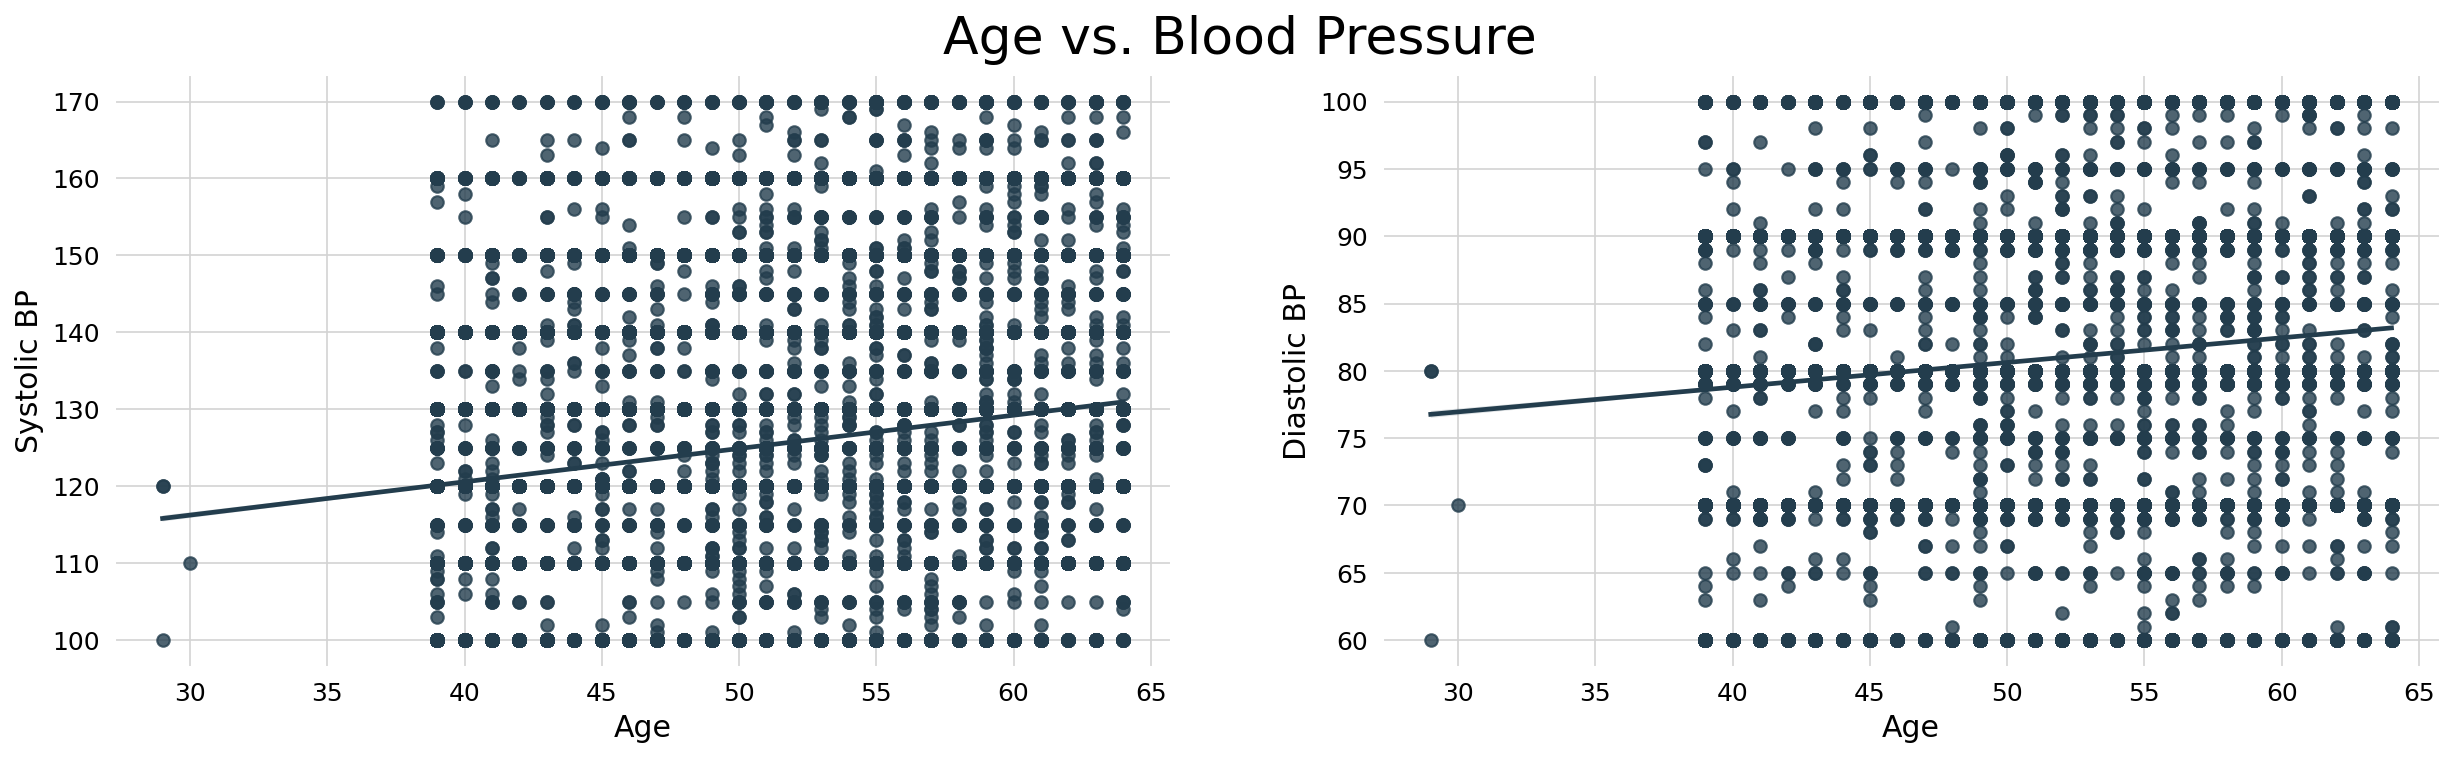

In [22]:
# Creating Figure
fig_10, axes = plt.subplots(1, 2)

# Plot 1
plt.subplot(1, 2, 1)
fig_101 = sns.regplot(data=data, x='age', y='ap_hi')
fig_101 = set_image(fig_101, None, 'Age', 'Systolic BP')

# Plot 2
plt.subplot(1, 2, 2)
fig_102 = sns.regplot(data=data, x='age', y='ap_lo')
fig_102 = set_image(fig_102, None, 'Age', 'Diastolic BP')

# Main Title
fig_10.suptitle('Age vs. Blood Pressure')

# Adjusting Spacing
fig_10.subplots_adjust(top=0.9)

### 3.11. Weight vs. Glucose ?

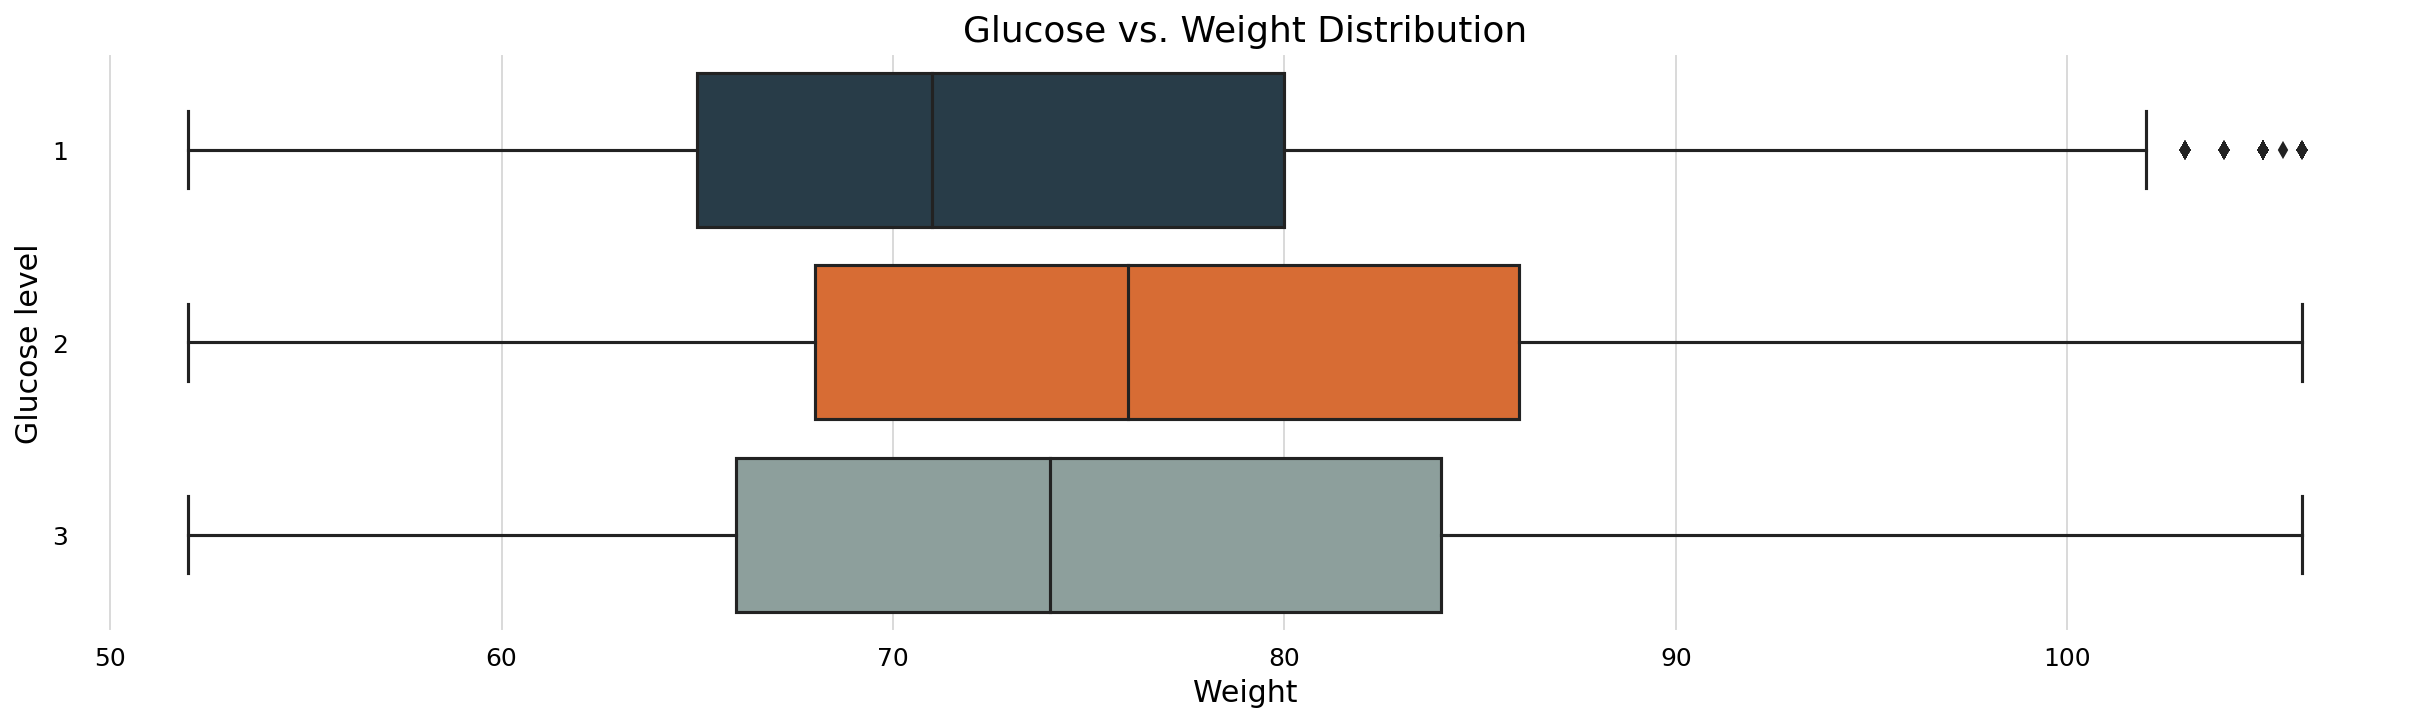

In [23]:
# Figure
fig_11 = sns.boxplot(data=data, x='weight', y='gluc', orient='horizontal')

# Customizing Figure
fig_11 = set_image(fig_11, 'Glucose vs. Weight Distribution', 'Weight', 'Glucose level')

### 3.12. EDA Conclusions

- The older the people, the higher the risk of having a cardiovascular disease (CVD);
- The higher the cholesterol and glucose level, the higher the risk of having a CVD;
- The majority of people with "above normal" and "well above normal" level of cholesterol and glucose have CVD;
- There are no explicit correlations between height and CVD;
- Women in the dataset have a much higher consumption of alcohol than men;
- Men, on the other side, practice a lot more activities than the opposite gender;
- Smoking, in this dataset, is much more common for women than men;
- A lower percentage of men have CVD compared to women (17.0% vs. 32.2%);
- It is uncommon to be inactive and not have a cardiovascular problem (less than 1%);
- More than 40% of the dataset is active and does not have CVD;
- The regplots for Age vs. Blood Pressures show that the older people get, the higher their blood pressure (for Systolic and Diastolic);
- Glucose level 2 (above normal) has the highest median for weight on the dataset, followed by level 3 (well above normal) and by level 1 (normal).

*It is important to consider that there are almost double the size of women (39,564) than men (21,092) in this sample.

## 4. Feature Engineering

- Drop index;
- Creation of variables: BMI, BMI group;
- Correlation heatmap;
- Train-test split;
- Features selection.

### 4.1. Features 

In [24]:
# Dropping index
data.drop('id', axis=1, inplace=True)

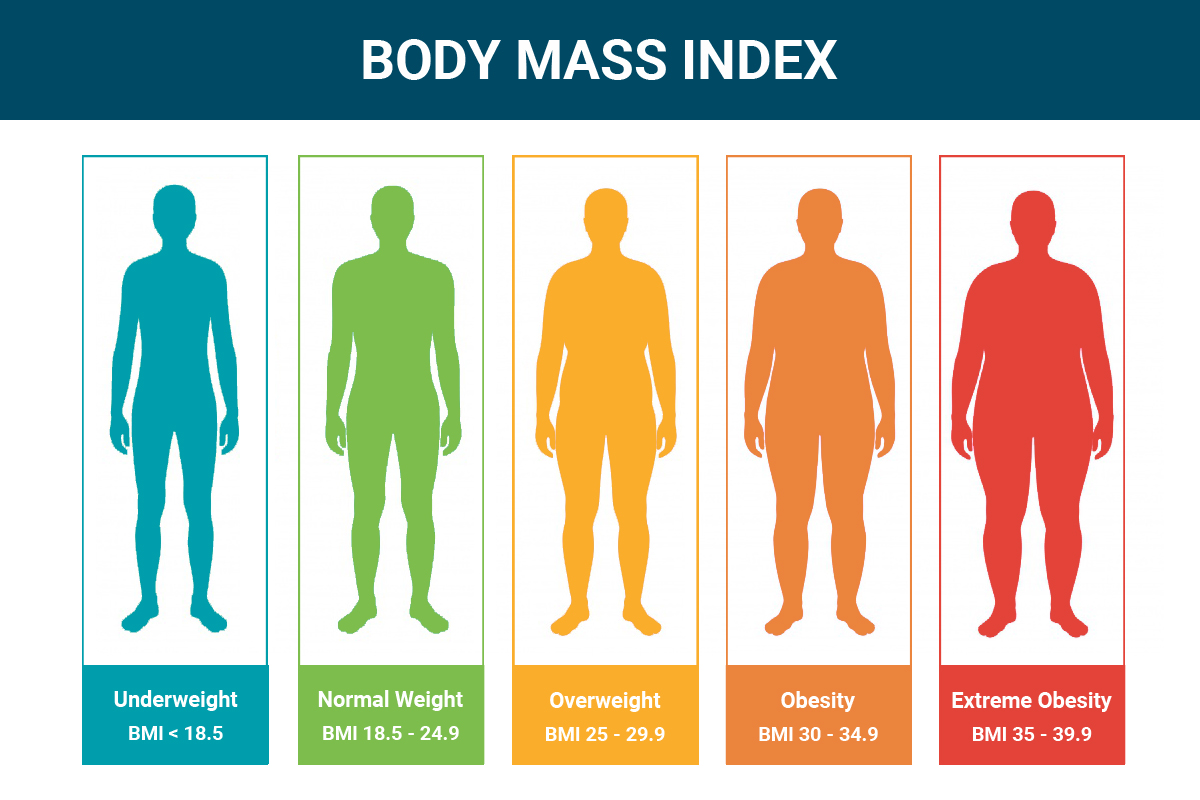

In [25]:
Image('../images/body-mass-index.jpg')

In [26]:
# Creating Body Mass Index feature
data['bmi'] = data['weight'] / ((data['height'] / 100) ** 2)

# Creating levels for BMI 
data['bmi_level'] = data['bmi'].apply(lambda x: 1 if x < 18.5 else   # underweight
                                      2 if x >= 18.5 and x < 25 else # normal
                                      3 if x >= 25 and x < 30 else   # overweight
                                      4 if x >= 30 and x < 35 else   # obese
                                      5 # extreme obesity
)

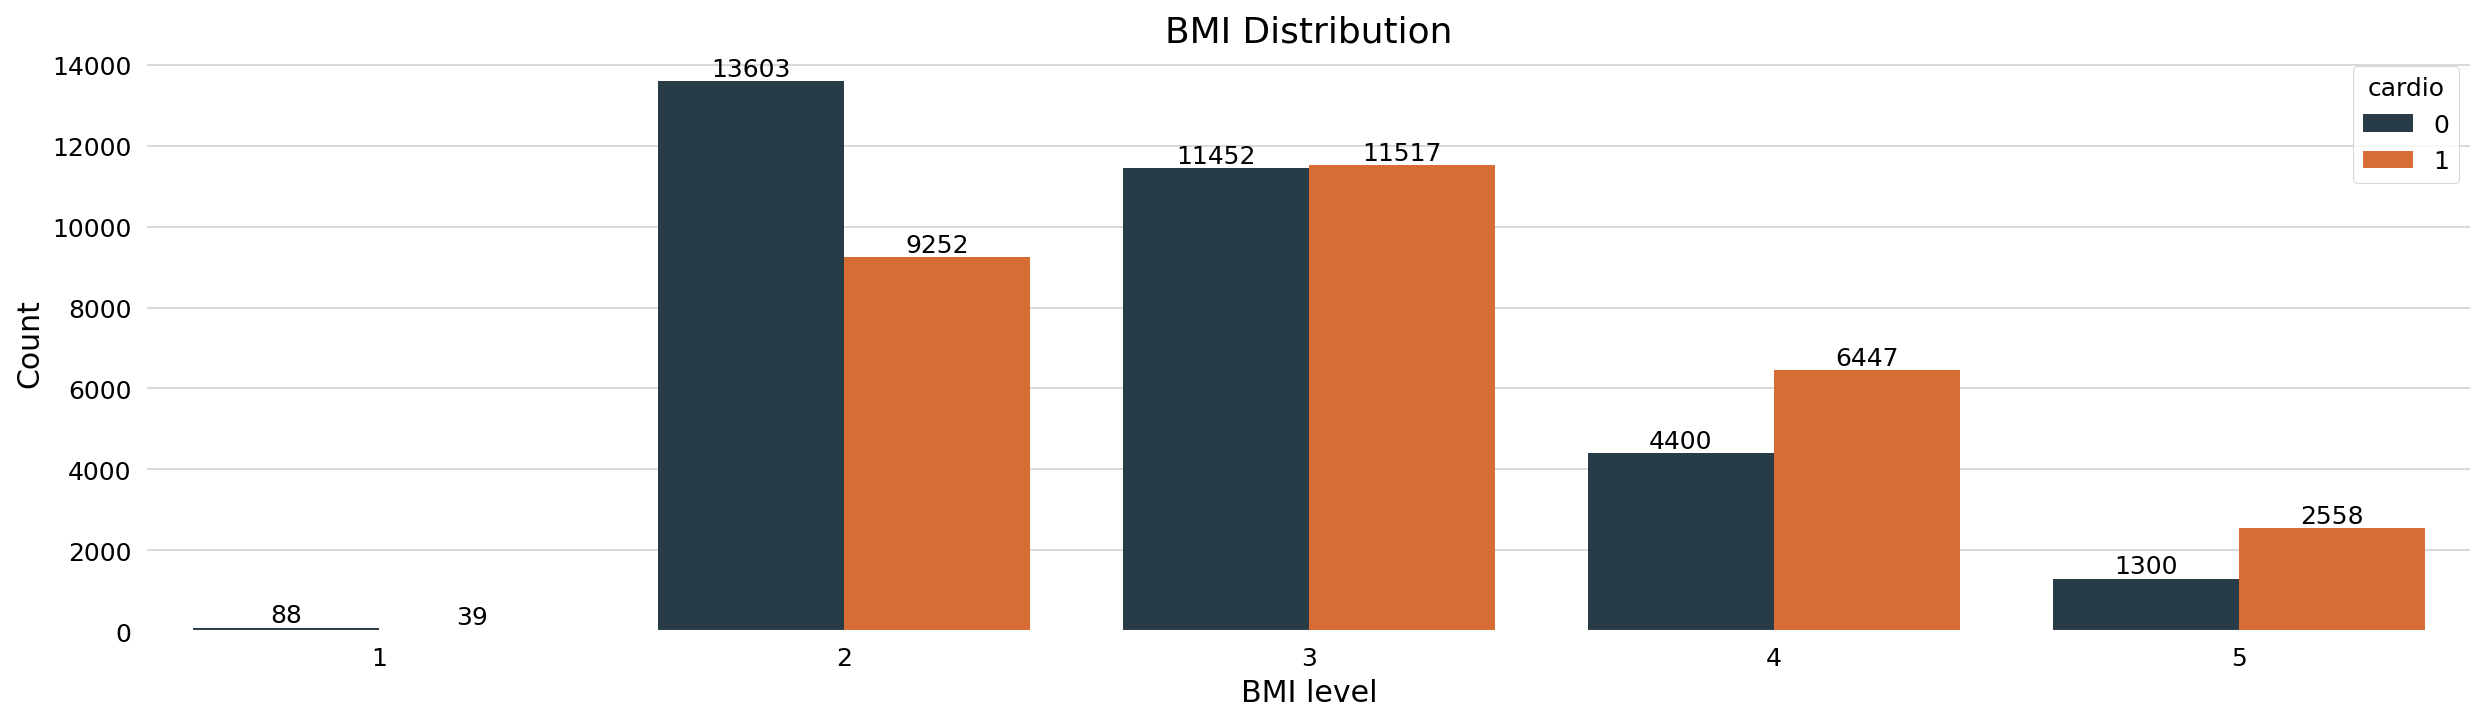

In [27]:
# Figure
fig_12 = sns.countplot(data=data, x='bmi_level', hue='cardio')

# Customizing Figure
fig_12 = set_image(fig_12, 'BMI Distribution', 'BMI level', 'Count')

for i in fig_12.containers:
    fig_12.bar_label(i)

### 4.2. Correlation Heatmap

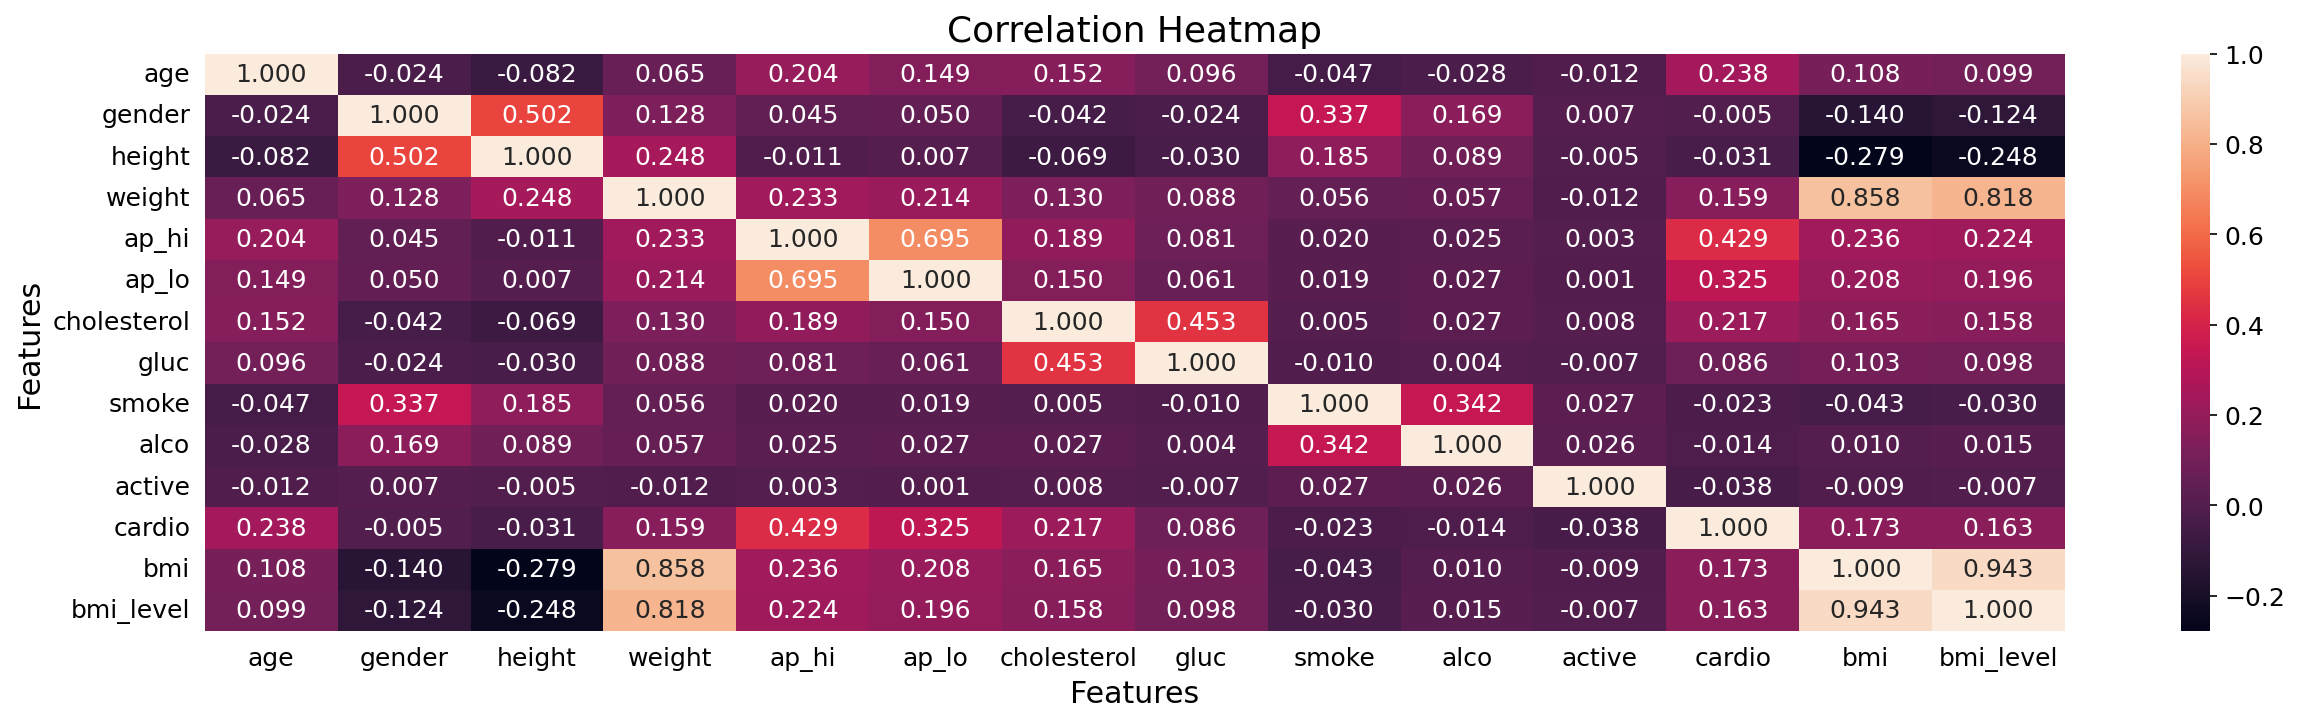

In [28]:
# Correlation Heatmap
fig_14 = sns.heatmap(data.corr(), annot=True, fmt='.3f')

    # Customizing Figure
fig_14 = set_image(fig_14, 'Correlation Heatmap', 'Features', 'Features')

- Cardio correlation (*highest to lowest*): `ap_hi`, `ap_lo`, `age`, `cholesterol`, `bmi`, `bmi_level`, `weight`, `active`, `height`, `smoke`, `alco`, `gender`

### 4.3. Train Test Split

In [29]:
# Splitting data
X = data.drop('cardio', axis=1)
y = data['cardio']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=SEED)

### 4.4. Scaling

#### When to use Standard Scaler, Robust Scaler and Min-Max Scaler?

##### Standard Scaler
- StandardScaler scales the features to have a mean of 0 and a standard deviation of 1. It centers the data around 0 and scales it by the standard deviation.
- StandardScaler is sensitive to outliers because it uses the mean and standard deviation.
- Assumes that the features are normally distributed.

##### Robust Scaler
- A good choice when the data contains outliers, because it uses median and interquartile range (IQR) instead of mean and standard deviation.
- In another words, it scales the features based on the median and scales them according to the IQR, making it less sensitive to outliers than Standard Scaler.

##### Min-Max Scaler
- It is useful when the data does not follow a normal distribution and we want to scale the features to a specific range like [0, 1]
- It is sensitive to outliers because it uses the minimum and maximum values, scaling the features to a specified range by shifting and rescaling the data.

In [30]:
# Considering the above
robust_columns = ['age', 'bmi'] # have outliers
min_max_columns = ['height', 'weight', 'ap_hi', 'ap_lo'] # are well behaved

In [31]:
# Creating a copy
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# Scalers
rs  = RobustScaler()
mms = MinMaxScaler()

# Applying Scalers to train
scaling_columns(X_train_scaled, robust_columns, rs)
scaling_columns(X_train_scaled, min_max_columns, mms)

# Applying Scalers to test
scaling_columns(X_test_scaled, robust_columns, rs)
scaling_columns(X_test_scaled, min_max_columns, mms)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,bmi,bmi_level
61694,0.500,1,0.633,0.148,0.143,0.250,1,1,0,0,1,-0.893,2
13890,1.000,2,1.000,0.574,0.429,0.750,1,1,0,0,1,-0.109,3
19379,-1.400,2,0.800,0.148,0.143,0.250,1,1,0,0,1,-1.095,2
11507,-1.500,2,0.333,0.333,0.286,0.000,1,2,0,0,0,0.184,3
62995,0.700,1,0.200,0.074,0.571,0.750,3,1,0,0,1,-0.552,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60303,0.500,2,0.933,0.574,0.429,0.250,3,1,0,0,1,-0.011,3
30581,-0.300,1,0.200,0.148,0.286,0.500,1,1,0,0,1,-0.273,2
12389,-1.200,1,0.467,0.148,0.429,0.500,1,1,0,0,1,-0.672,2
42241,-0.800,2,0.467,0.519,0.286,0.500,1,1,0,1,0,0.592,3


### 4.5. Features Selection

In [32]:
# ExtraTrees Model
etc = ExtraTreesClassifier(n_estimators=300, random_state=SEED)

# Fitting
etc.fit(X_train, y_train)

# Top features
top_features = pd.Series(etc.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Displaying top features
top_features

age           0.186
ap_hi         0.171
bmi           0.153
weight        0.133
height        0.132
ap_lo         0.094
cholesterol   0.044
bmi_level     0.020
gluc          0.020
gender        0.017
active        0.012
smoke         0.009
alco          0.007
dtype: float64

In [33]:
# Separating data
x_boruta = X_train.values
y_boruta = y_train.ravel()

# ExtraTrees Model
etc = ExtraTreesClassifier(n_estimators=100, random_state=SEED)

# Boruta
boruta = BorutaPy(etc, n_estimators='auto', verbose=0, random_state=SEED)

# Fitting
boruta.fit(x_boruta, y_boruta)

# Columns selected
boruta_cols = boruta.support_.tolist()
boruta_cols = X_train.iloc[:, boruta_cols].columns.tolist()
boruta_cols

['age', 'ap_hi', 'ap_lo', 'bmi']

## 5. Machine Learning and Evaluation

### 5.1. Models

In [34]:
# Defining models
models = {
    'Logistic Regression': 
        LogisticRegression(max_iter=1000, random_state=SEED),
    'Extra Trees Classifier': 
        ExtraTreesClassifier(n_estimators=1000, max_depth=None, random_state=SEED),
    'Random Forest Classifier': 
        RandomForestClassifier(n_estimators=1000, max_depth=9, random_state=SEED),
    'LGBM Classifier': 
        LGBMClassifier(objective='binary', n_estimators=1000, num_leaves=64,learning_rate=0.05, random_state=SEED)
}

### 5.2. Predictions

#### 5.2.1. Raw Features

In [35]:
# Lists to store results
model_names      = []
accuracy_scores  = []
precision_scores = []
recall_scores    = []
f1_scores        = []

# Iterate through each model
for model_name, model in models.items():
    
    # Fitting the model
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    # Metrics 
    accuracy  = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall    = recall_score(y_test, y_pred)
    f1score   = f1_score(y_test, y_pred)

    # Append results to lists
    model_names.append(model_name)
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1score)

# DataFrame with the results
results1 = pd.DataFrame({
    'Models for Raw Features': model_names,
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1 Score': f1_scores})

### 5.2.2. Scaled features 

In [36]:
# Lists to store results
model_names      = []
accuracy_scores  = []
precision_scores = []
recall_scores    = []
f1_scores        = []

# Iterate through each model
for model_name, model in models.items():
    
    # Fitting the model
    model.fit(X_train_scaled, y_train)

    # Predict
    y_pred = model.predict(X_test_scaled)

    # Metrics 
    accuracy  = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall    = recall_score(y_test, y_pred)
    f1score   = f1_score(y_test, y_pred)

    # Append results to lists
    model_names.append(model_name)
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1score)

# DataFrame with the results
results2 = pd.DataFrame({
    'Models for Scaled Features': model_names,
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1 Score': f1_scores})

### 5.2.3. Best result without weak features

In [37]:
# Comparing the previous results, the raw features performed better in general. 
# So we will use the raw features in the next step, removing weak features according 
# to the feature importance to see if it improves the model.

# Data manipulation
cols_drop = ['gender', 'active', 'smoke', 'alco']

X_train.drop(cols_drop, axis=1, inplace=True)
X_test.drop(cols_drop, axis=1, inplace=True)

# Lists to store results
model_names      = []
accuracy_scores  = []
precision_scores = []
recall_scores    = []
f1_scores        = []

# Dictionary to store predictions
predictions_dict = {}

# Iterate through each model
for model_name, model in models.items():
    
    # Fitting the model
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    # Store predictions in the dictionary
    predictions_dict[model_name] = y_pred

    # Metrics 
    accuracy  = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall    = recall_score(y_test, y_pred)
    f1score   = f1_score(y_test, y_pred)

    # Append results to lists
    model_names.append(model_name)
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1score)

# DataFrame with the results
results3 = pd.DataFrame({
    'Models for Raw & Selected Features': model_names,
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1 Score': f1_scores})

### 5.3. Metrics Results

- **Accuracy:** measures how many predictions were correctly predicted by the model. Correct predictions divided by total sample size.

<center>

**Accuracy = (True Positives + True Negatives) / Total Predictions**

</center>

- **Precision:** focuses on the accuracy of positive predictions, indicating the proportion of true positives among all positive predictions. Important when the cost of false positives is high.

<center>

**Precision = True Positives / (True Positives + False Positives)**

</center>

- **Recall:** measures the ability of a model to capture all relevant instances, indicating the proportion of true positives among all actual positives. Important when missing positive instances is costly.

<center>

**Recall = True Positives / (True Positives + False Negatives)**

</center>

- **F1-Score:** it is the harmonic mean of precision and recall, providing a balance between them. 

<center>

**F1-score = 2 * (Precision * Recall) / (Precision + Recall)**

</center>

- In this project, we want to maximize the Precision, but the perfect scenario is also maximizing Recall due to False Negatives and look for the balance of these two metrics in F1-Score.

In [38]:
results1

,Models for Raw Features,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.716,0.743,0.644,0.690
1,Extra Trees Classifier,0.694,0.693,0.677,0.685
2,Random Forest Classifier,0.722,0.753,0.645,0.695
3,LGBM Classifier,0.715,0.733,0.661,0.695


In [39]:
results2

,Models for Scaled Features,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.716,0.752,0.629,0.685
1,Extra Trees Classifier,0.692,0.696,0.663,0.679
2,Random Forest Classifier,0.720,0.757,0.636,0.691
3,LGBM Classifier,0.714,0.739,0.645,0.689


In [40]:
results3

,Models for Raw & Selected Features,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.712,0.741,0.638,0.685
1,Extra Trees Classifier,0.682,0.681,0.662,0.672
2,Random Forest Classifier,0.723,0.751,0.653,0.699
3,LGBM Classifier,0.712,0.733,0.653,0.690


#### 5.3.1. Conclusions

- The best Precision is for Random Forest Classifier on Scaled Features (0.757) but its Recall is the lowest on three tests (0.636);
- The best Recall is for Extra Trees Classifier on Raw Features (0.677), but Precision and F1-Score are below 0.7 as well;
- We will continue with a Hyperparameter Tuning on **Random Forest** and **LGBM** on Raw & Selected Features, which returned good metrics.

### 5.4. Confusion Matrix

<Figure size 750x750 with 0 Axes>

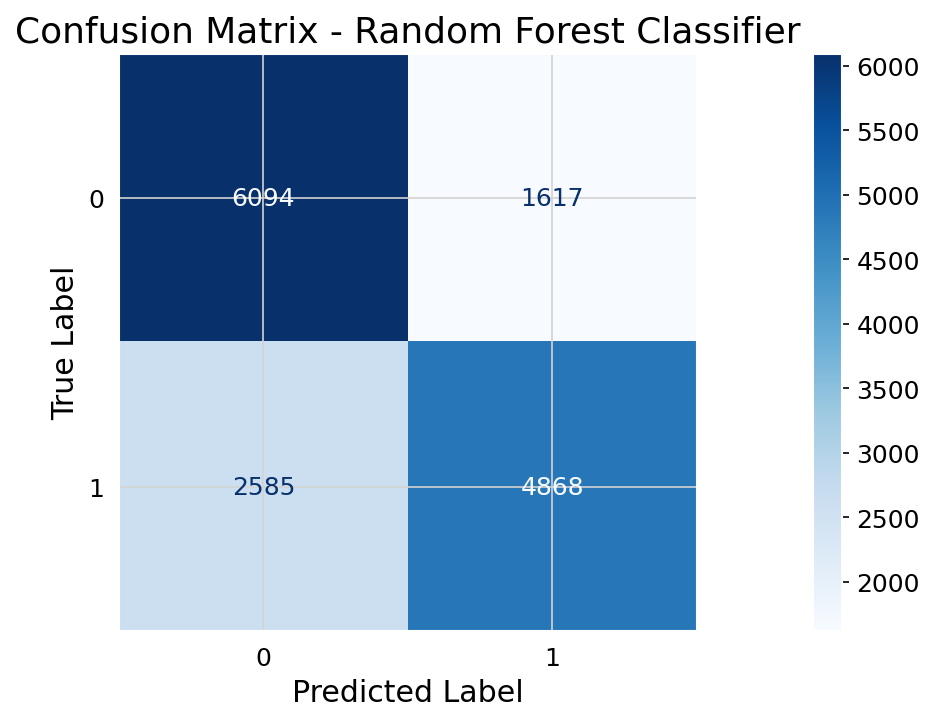

In [41]:
# Results
name = list(predictions_dict.keys())[2]
y_pred = predictions_dict[list(predictions_dict.keys())[2]]

# Confusion Matrix
CM(f'Confusion Matrix - {name}', y_test, y_pred)

### 5.5. Hyperparameter Tuning

### 5.5.1. RandomForestClassifier

In [42]:
# Model
rf_classifier = RandomForestClassifier()

# Precision as the scoring metric
precision_scorer = make_scorer(precision_score)

# Hyperparameter grid
param_dist = {
    'n_estimators': [300, 600, 900, 1200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]}

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    rf_classifier, 
    param_distributions=param_dist, 
    n_iter=12,  # (15)
    scoring=precision_scorer,  
    cv=5,  
    n_jobs=-1,  
    random_state=SEED)


# Fitting the model to training data
random_search.fit(X_train, y_train)

# Best hyperparameters
print("Best Hyperparameters:", random_search.best_params_)

# Evaluating the best model on the test set
best_model = random_search.best_estimator_
test_precision = precision_score(y_test, best_model.predict(X_test), average='weighted')
print(f"Test Precision with Best Model: {test_precision:.4f}")

Best Hyperparameters: {'n_estimators': 1200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 5, 'bootstrap': True}
Test Precision with Best Model: 0.7213


In [43]:
# Making predictions on the test set
y_pred = best_model.predict(X_test)

# Printing metrics for the best model
model_report('RandomForestClassifier', y_test, y_pred)

Model Name: RandomForestClassifier
Accuracy: 0.717
Precision: 0.7504
Recall: 0.6356
F1 Score: 0.6882
Classification Report: 
               precision    recall  f1-score   support

           0       0.69      0.80      0.74      7711
           1       0.75      0.64      0.69      7453

    accuracy                           0.72     15164
   macro avg       0.72      0.72      0.71     15164
weighted avg       0.72      0.72      0.71     15164



<Figure size 750x750 with 0 Axes>

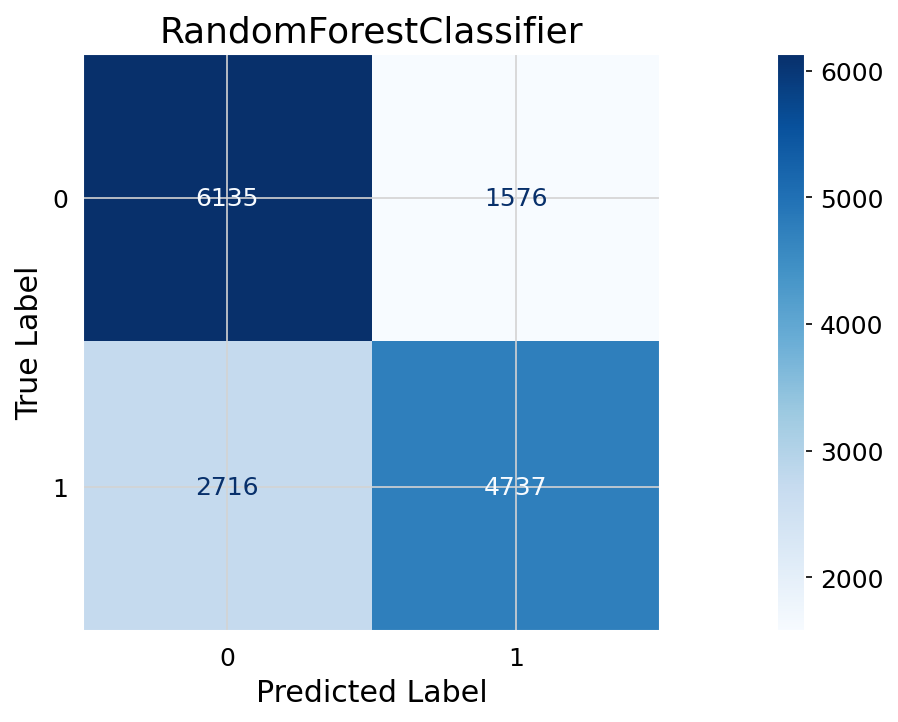

In [44]:
# Confusion Matrix for best model
CM('RandomForestClassifier', y_test, y_pred)

### 5.5.2. LGBMClassifier

In [45]:
# Model
lgbm = LGBMClassifier()

# Precision as the scoring metric
precision_scorer = make_scorer(precision_score)

# Hyperparameter space
param_dist = {
    'n_estimators': [750, 1000, 1200],
    'objective': ['binary'],
    'metric': ['binary_logloss'],
    'boosting_type': ['gbdt'],
    'num_leaves': [32, 64, 128],
    'max_depth': [-1, 5, 10],
    'min_child_samples': [10, 20, 30],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.5, 0.7, 0.9],
    'learning_rate': [0.01, 0.05, 0.1],
    'random_state': [SEED]}

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    lgbm, 
    param_distributions=param_dist, 
    n_iter=10, 
    scoring=precision_scorer, 
    cv=5, 
    random_state=SEED)

# Fitting the model
random_search.fit(X_train, y_train)

# Best parameters
best_params = random_search.best_params_
print("Best Parameters:", best_params)

# Best model
best_model = random_search.best_estimator_

Best Parameters: {'subsample': 0.8, 'random_state': 42, 'objective': 'binary', 'num_leaves': 32, 'n_estimators': 1200, 'min_child_samples': 10, 'metric': 'binary_logloss', 'max_depth': 10, 'learning_rate': 0.01, 'colsample_bytree': 0.9, 'boosting_type': 'gbdt'}


In [46]:
# Making predictions on the test set
y_pred = best_model.predict(X_test)

# Printing metrics for the best model
model_report('LGBMClassifier', y_test, y_pred)

Model Name: LGBMClassifier
Accuracy: 0.7231
Precision: 0.7481
Recall: 0.6583
F1 Score: 0.7003
Classification Report: 
               precision    recall  f1-score   support

           0       0.70      0.79      0.74      7711
           1       0.75      0.66      0.70      7453

    accuracy                           0.72     15164
   macro avg       0.73      0.72      0.72     15164
weighted avg       0.73      0.72      0.72     15164



<Figure size 750x750 with 0 Axes>

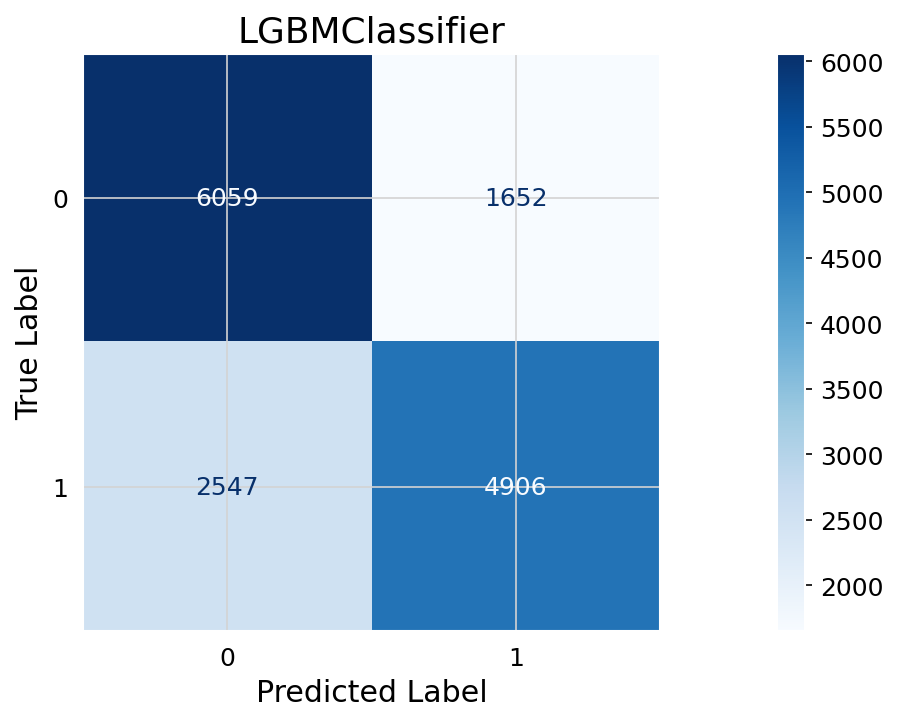

In [47]:
# Confusion Matrix for best model
CM('LGBMClassifier', y_test, y_pred)

## 6. Business Results

**Reminder:**

Currently, the precision of the diagnosis ranges between 55% and 65%, reflecting its complexity and the limited availability of medical doctors. The total cost per diagnosis, encompassing both equipment and analysts' compensation, is approximately $1,000.

For clients, the pricing model for the diagnosis costs $500 for every 5% increase in precision beyond the 50% baseline.

In [49]:
# Informations
price_per_pacient = 500/5
baseline = 50
num_pacients = 70000

# New precision
model_precision = precision_score(y_test, y_pred)

# Amount of money
amount = ((((model_precision * 100) - baseline) * price_per_pacient) * num_pacients)

# Displaying results
print(f'Amount: ${amount:,.2f}')

Amount: $173,665,751.75


**The deliverables:**

- The precision of the model now is at **75%**

- The revenue of the new model is **$173,665,751.75**

- Considering the previous precision of **65%**, the revenue was around **$105,000,000**, which results in an improvement of **$68,665,751.75** (or an increase of **65%**) using the new model.

- How reliable are the results of the new tool? The other metrics for the model are **Accuracy: 72.3%**, **Recall: 65.8%**, **F1 Score: 70%**.